<a href="https://colab.research.google.com/github/dae9999nam/Machine_Learning/blob/main/COMP3314_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this course, we are going to learn three different learning.

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning


In [1]:
# 1. Dataset Loading

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [2]:
#Iris Dataset - Preprocessing and Plotting
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [3]:
#Perceptron - Implementation
import numpy as np

class Perceptron(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi)) # (learning rate) * (true class label - predicted class label)
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)



In [4]:
# Perceptron - Training

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('1.1 Perceptron Training')
plt.show()

/tmp/ipython-input-5-4173417400.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


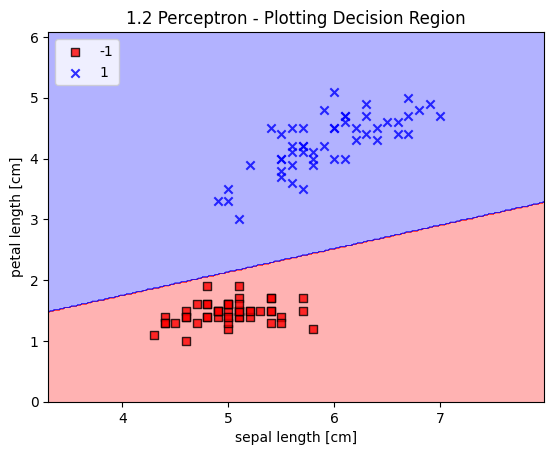

In [5]:
#Perceptron - Plotting Decision Region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('1.2 Perceptron - Plotting Decision Region')
plt.legend(loc='upper left')
plt.show()

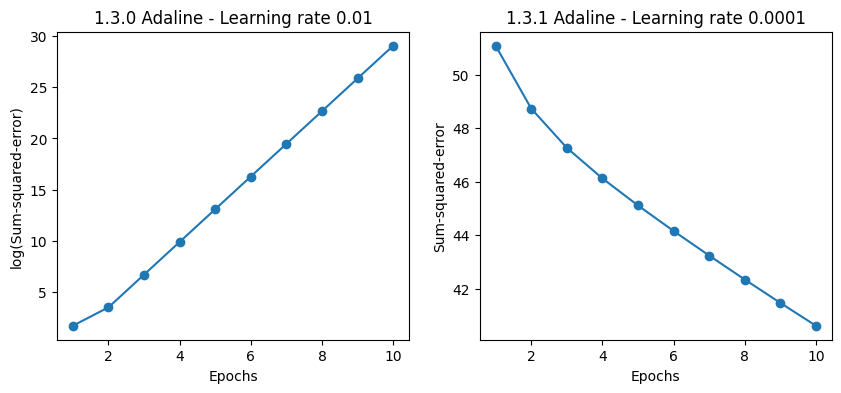

In [6]:
#Adaline - Implementation
class AdalineGD(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
adal = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1,len(adal.cost_) + 1), np.log10(adal.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('1.3.0 Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('1.3.1 Adaline - Learning rate 0.0001')
plt.show()

/tmp/ipython-input-5-4173417400.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


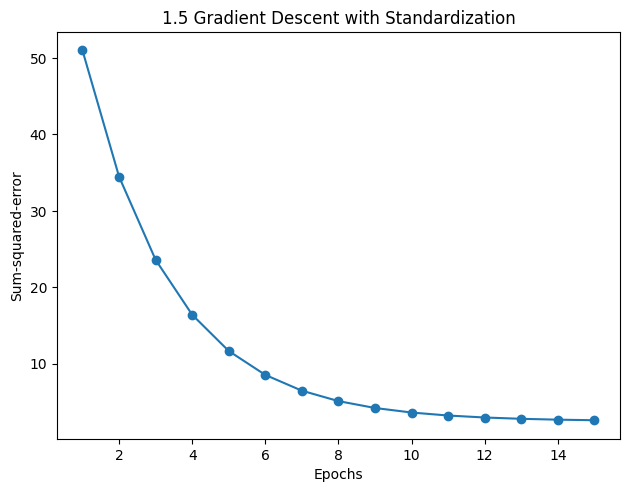

In [7]:
#Standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.4 Adaline - Gradient Descent with standardization')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal legnth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.title('1.5 Gradient Descent with Standardization')
plt.show()

/tmp/ipython-input-5-4173417400.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


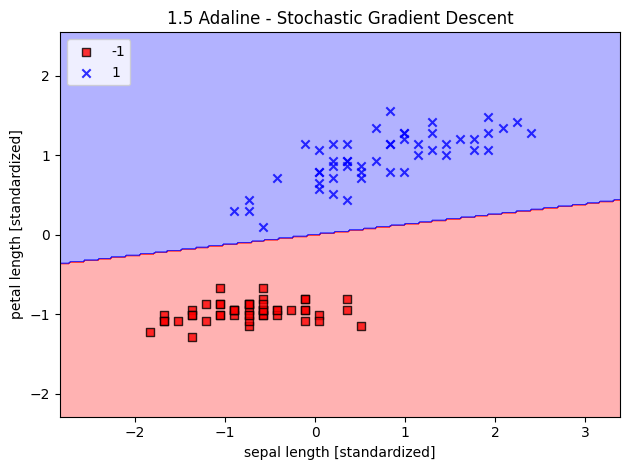

In [8]:
#Mini Batch Learning
class AdalineSGD(object):
  def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter): # for iteration
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y): # for training samples
        cost.append(self._update_weights(xi,target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self
  # for online learning, update weight with new training sample
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # check if case of newly arrived sample is more than one or not
    if y.ravel().shape[0] > 1 : #y.ravel() == flatten operation
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X,y)
    return self
  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]
  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi)) # xi == current sample, activation function is linear activation function
    error = (target - output) # target is binary, output is continuous value, output is different to perceptron, binary
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2 #0.5 for cancel out 2 from derivatives
    return cost # for single traning sample. No need for overall cost
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
    return X
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.5 Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

In [9]:
#Scikit-learn Libaray

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

import numpy as np
print('Class labels:', np.unique(y))

#Traning and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
#test_size = 30% of total data set
#dataset is sorted by label --> if we just cut the dataset into portion, training will not be done well due to biased dataset
# therefore we need stratify so that both training and testing data have same proportion of sample label

## Note that train_test_split function shuffles the training sets internally and performs stratification before splitting

print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) #mean and standard deviation for individual data
X_train_std = sc.transform(X_train) #apply above parameters to original data
X_test_std = sc.transform(X_test)



Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Lables counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [10]:
#training
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_train_std)
print('Misclassified training samples:', (y_train != y_pred).sum()) #.sum() result shows count the number of sample not same

#Testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples:', (y_test != y_pred).sum())

#Testing - Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy using accuracy_score(): %.3f' % accuracy_score(y_test, y_pred))

#Alternatively
print('Accuracy using .score(): %.3f ' %ppn.score(X_test_std, y_test))

Misclassified training samples: 6
Misclassified samples: 1
Accuracy using accuracy_score(): 0.978
Accuracy using .score(): 0.978 


/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


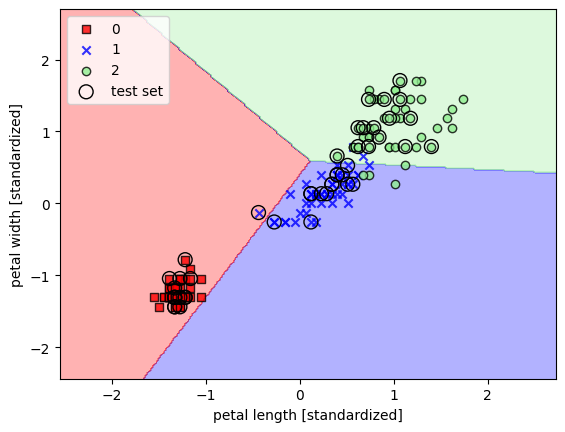

In [11]:
#Decision Regions Plotting

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                alpha=1.0, linewidth = 1, marker = 'o', s=100, label = 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Chapter 2 Logistic Regression, SVM, Decision Tree, KNN

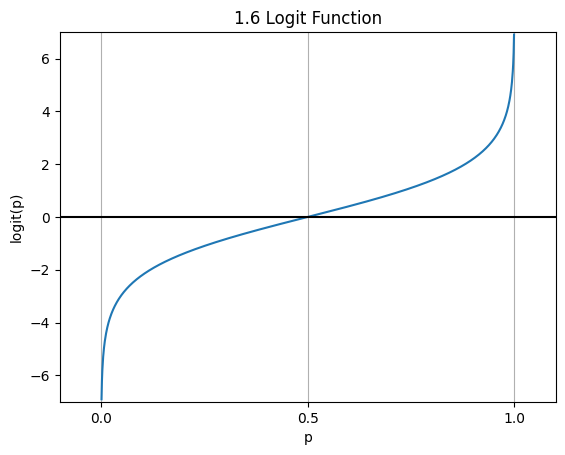

In [12]:
#Logit function

import matplotlib.pyplot as plt
import numpy as np
def logit(p):
    return np.log(p/(1-p))
p = np.arange(0.001, 1, 0.001)
lp = logit(p)
plt.plot(p, lp)
plt.axhline(0, color='k')
plt.xlim(-0.1, 1.1)
plt.ylim(-7,7)
plt.title('1.6 Logit Function')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.xticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.xaxis.grid(True)
plt.show()

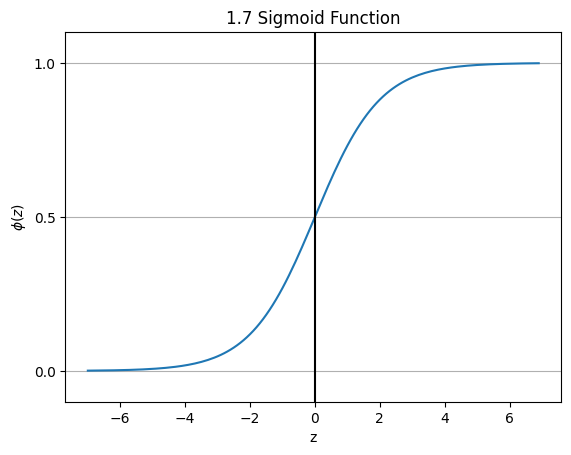

In [13]:
# Inverse of Logit (Sigmoid) Function
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.title('1.7 Sigmoid Function')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()



In [14]:
#Plotting our new J
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label = 'J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.title('1.8 Plotting our new J')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


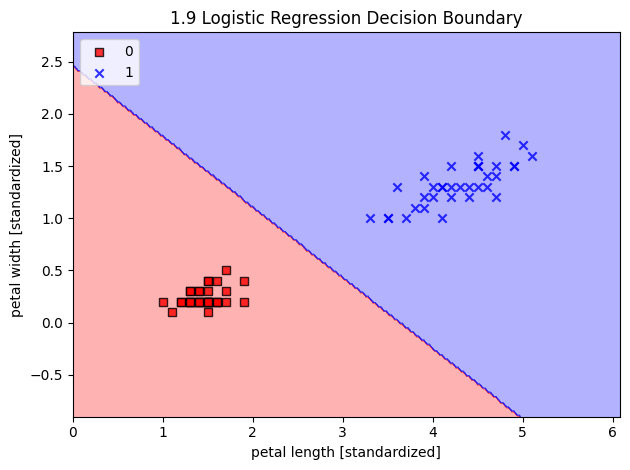

In [15]:


#From Adaline to Logistic Regression

class LogisticRegressionGD(object):
  def __init__(self, eta=0.05, n_iter=100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output)))
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:])+ self.w_[0]
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, 0)
      # equivalent to :
      #return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

#Display Data using decision regions
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('1.9 Logistic Regression Decision Boundary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


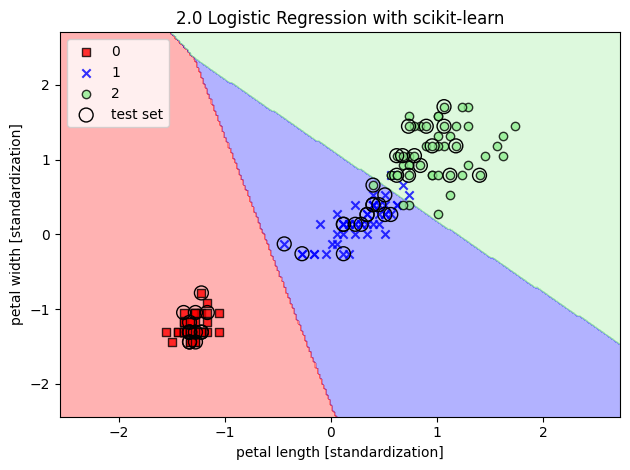

In [16]:
#Logistic Regression with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver="liblinear", multi_class = 'ovr') #OvR by default
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardization]')
plt.ylabel('petal width [standardization]')
plt.title('2.0 Logistic Regression with scikit-learn')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
#Prediction
#Probability thast training examples belong to a certain class computed

lr.predict_proba(X_test_std[:3, :])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [18]:
#And each row the columns sum all up 1
lr.predict_proba(X_test_std[:3, :]).sum(axis = 1)

array([1., 1., 1.])

In [19]:
#Get the predicted class labels by identifying the largest column in each row Using Numpy's argmax function
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
#Or manual approach to aclling the predic method directly
#lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [20]:
#Regularization

weights,params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1, solver='liblinear')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.title('2.1 L2 Regularization with two weight coefficient')
plt.xscale('log')
plt.show()

In [21]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.2 Support Vector Machine')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


In [22]:
#Alternative Scikit-learn Impelmentations
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

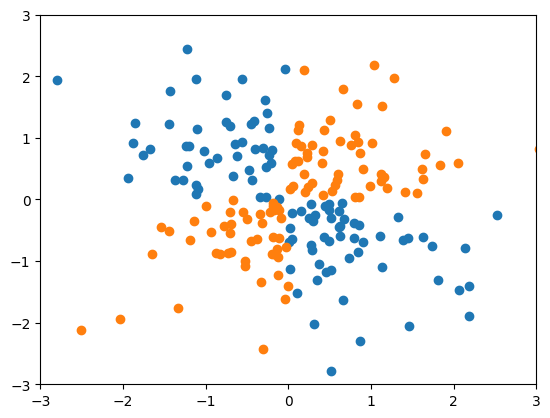

In [23]:
#Kernel SVM
#Linearly inseparable data
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor== 1, 1])
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


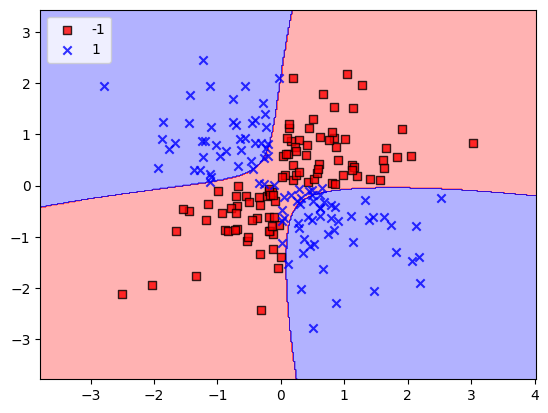

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C= 10.0, gamma = 0.1, random_state= 1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc='upper left')
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


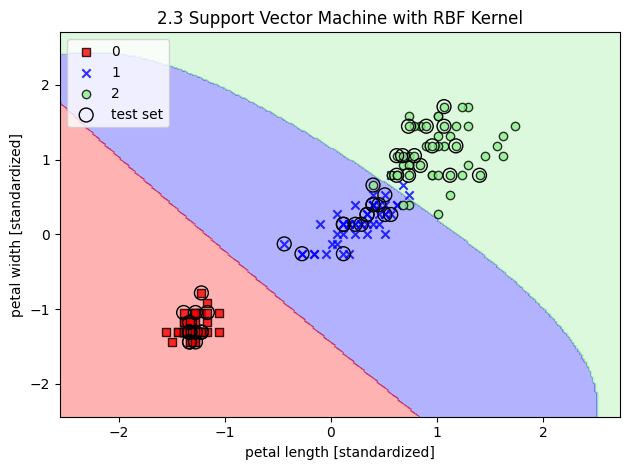

In [25]:
#Gamma = cut-off parameter for the Gaussian
#Increase the gamma value, we decrease the influence or reach of the training smaples, which leads to a tighter and bumpier decision boundary
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.3 Support Vector Machine with RBF Kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


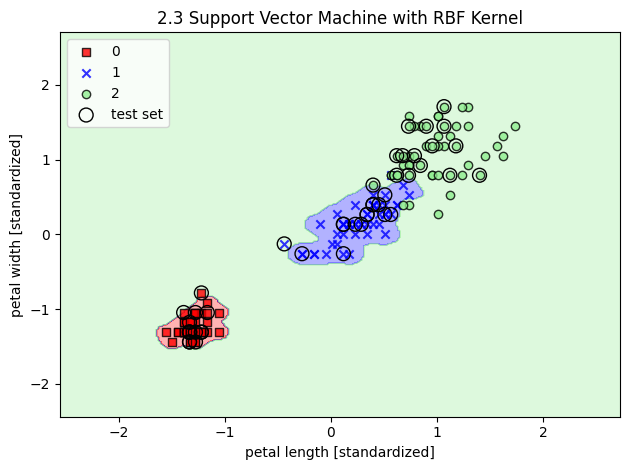

In [26]:
svm = SVC(kernel='rbf', random_state = 1, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.3 Support Vector Machine with RBF Kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

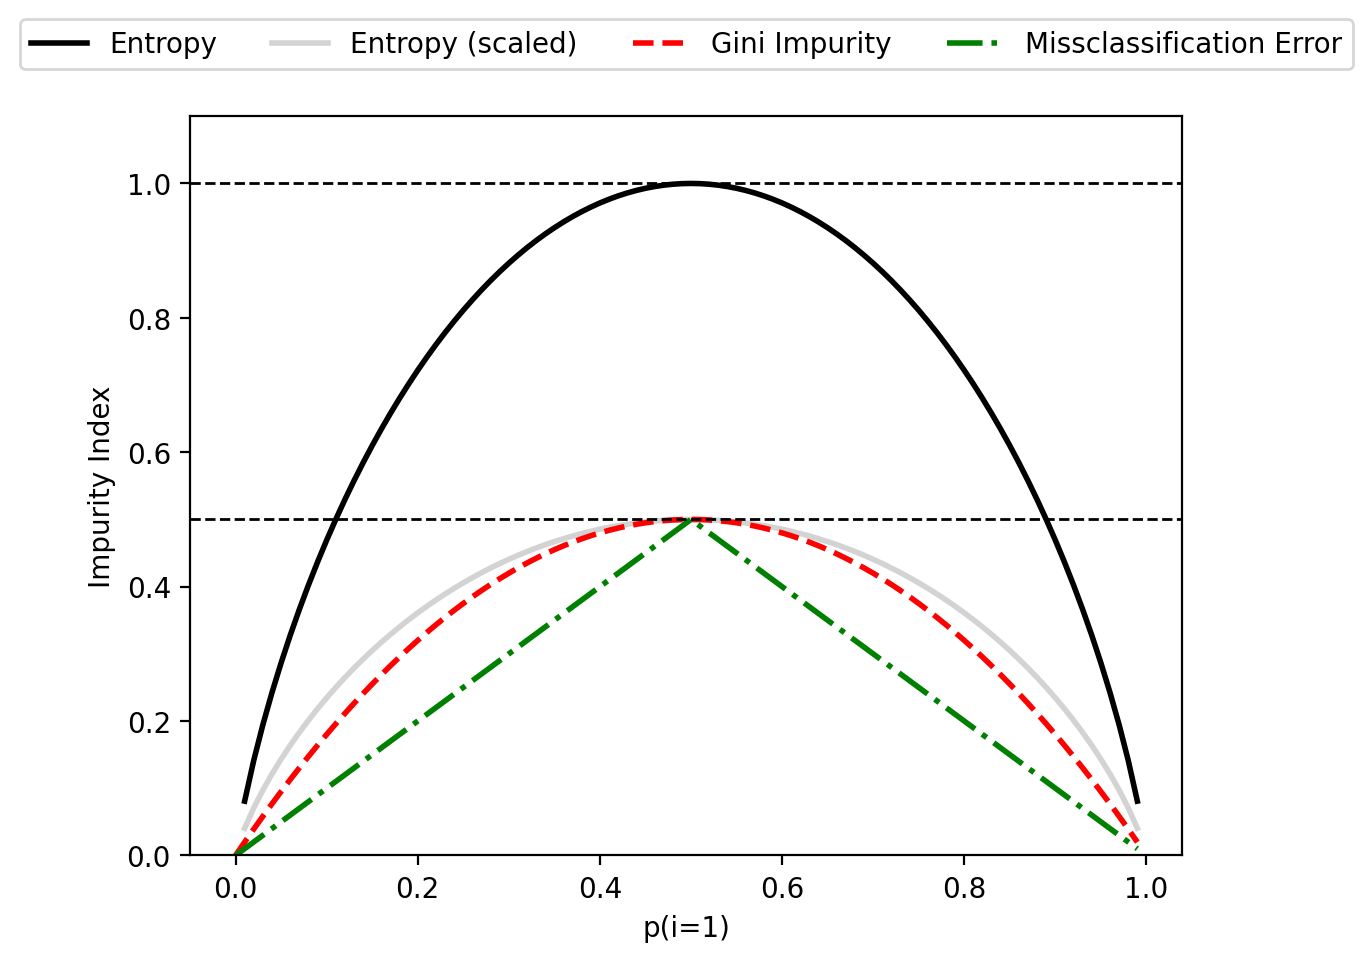

In [27]:
def gini(p):
  return p*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
  return - p* np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
  return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity', 'Missclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


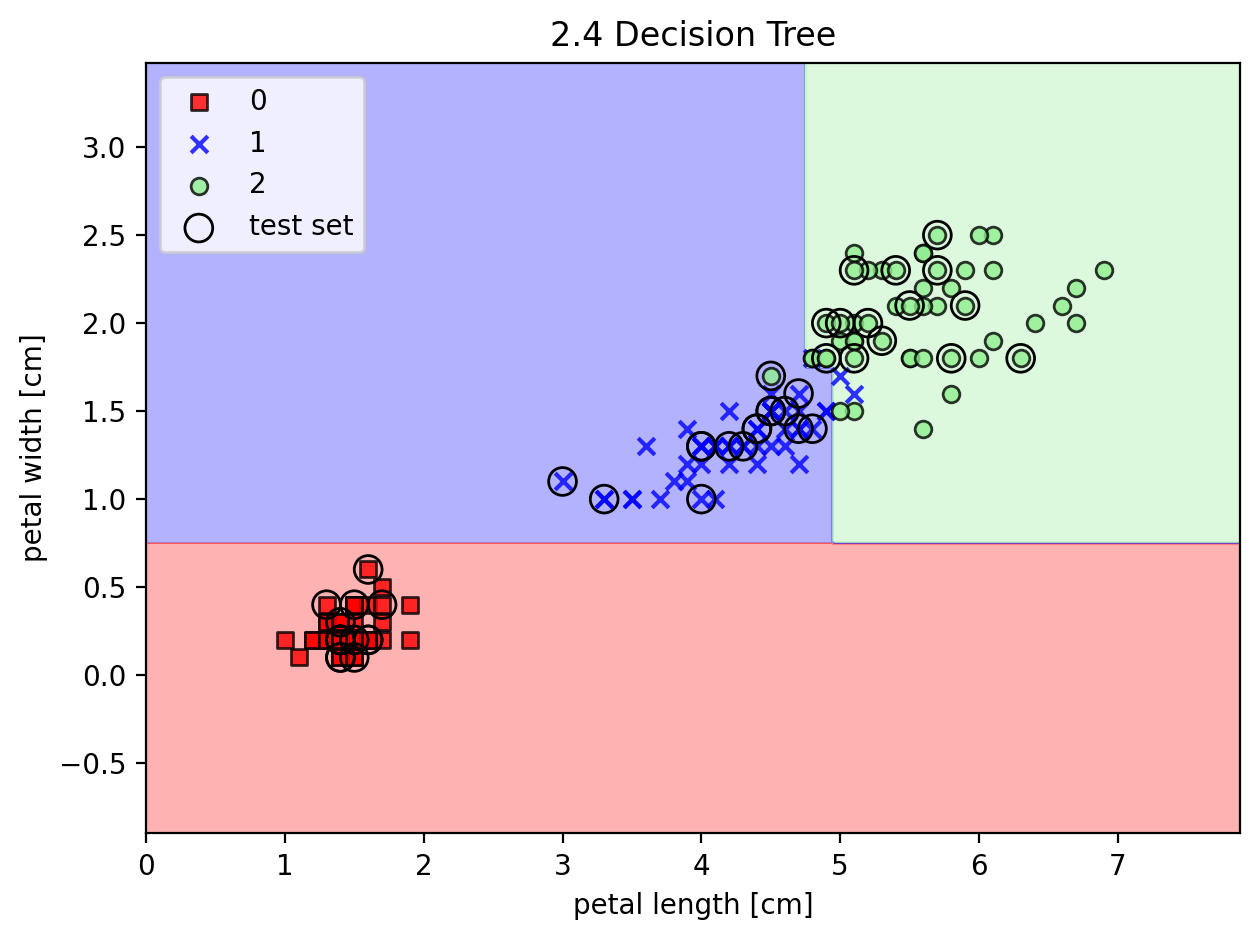

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.4 Decision Tree')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
#The following code will create an image of our decision tree in PNG format
#For this to work you may install
# `sudo apt_get install graphviz`
# `pip install pydotplus`

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
from google.colab import files
files.download('tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

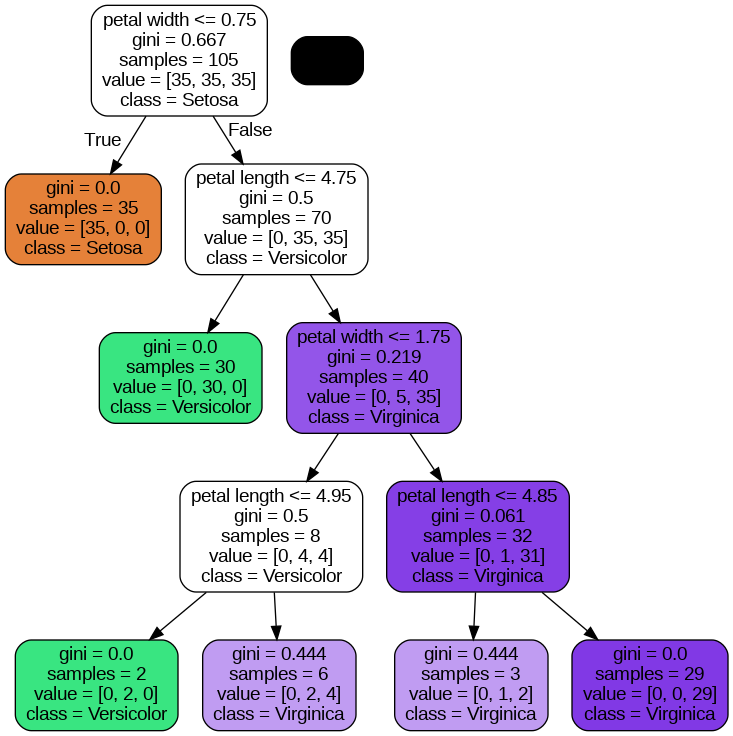

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


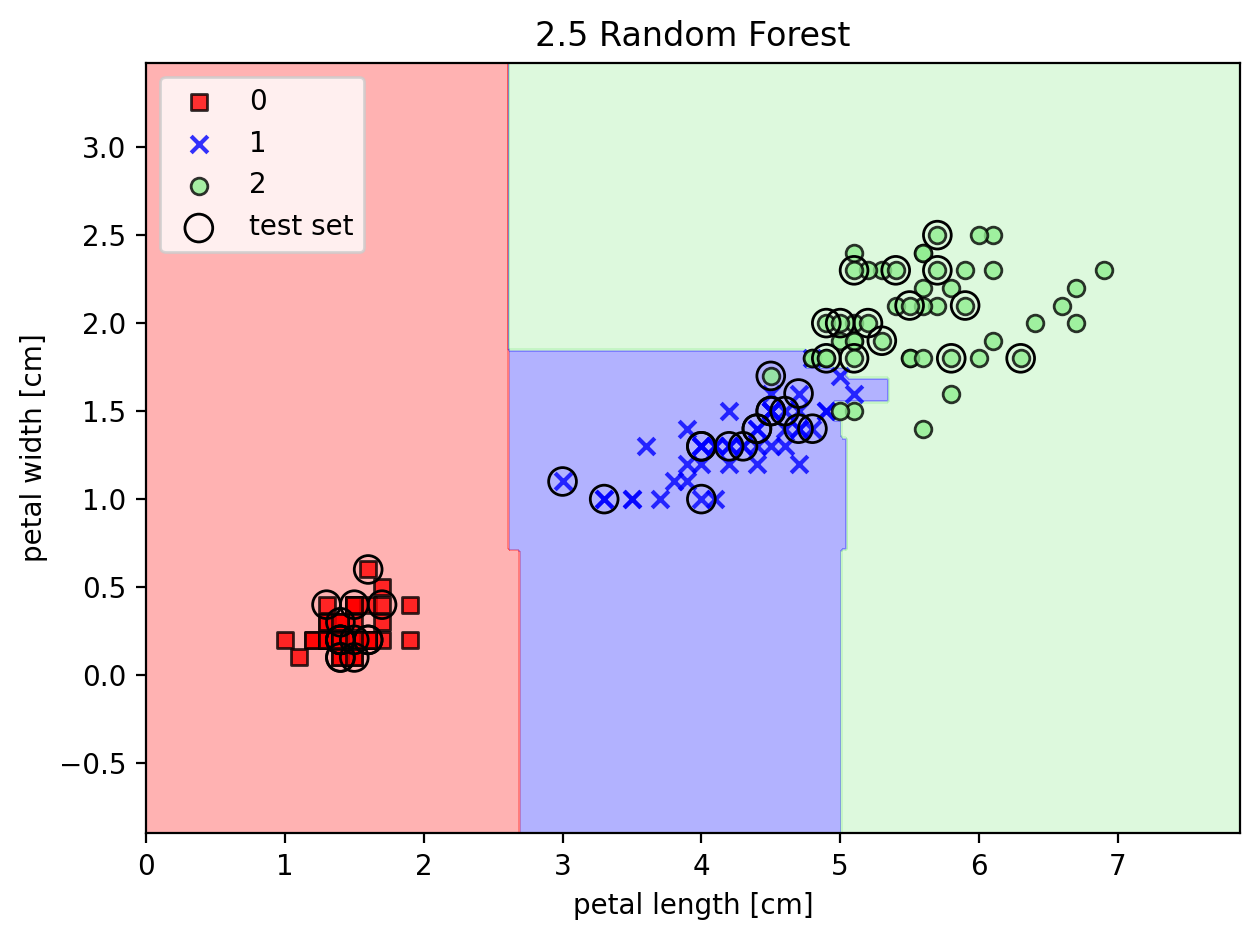

In [30]:
#Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.5 Random Forest')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


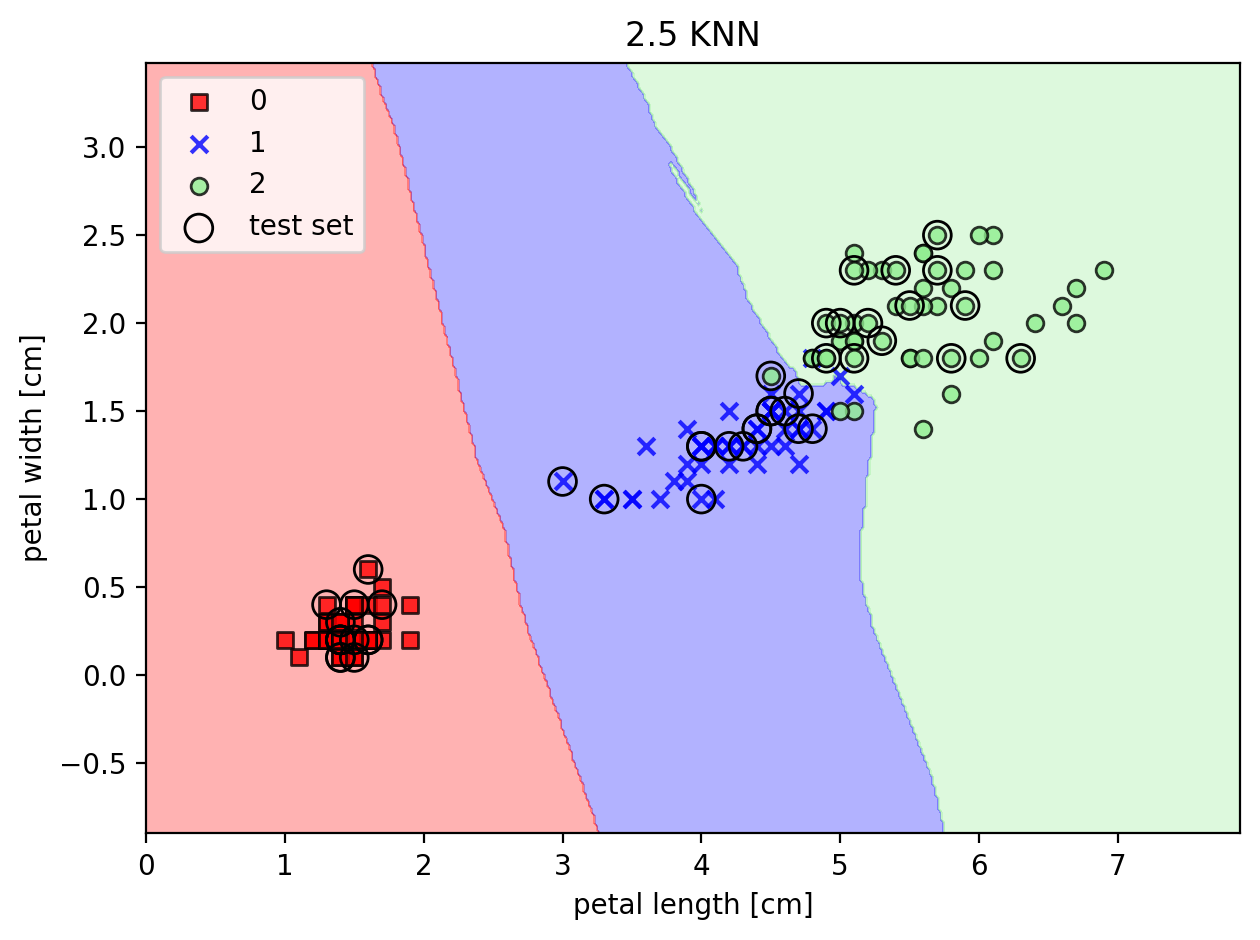

In [31]:
#KNN Implementation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.5 KNN')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
#Pre-processing data
#1. How to remove and impute missing values from the dataset
#2. Get categorical data into shape
#3. Select relevant features

'''Speically
- Dealing with missing data
- Nomial and ordinal features
- Partitioning a dataset into training and testing sets
- Bringing features onto the same scale
- Selecting meaningful features
- Sequential feature selection algorithms
- Random Forest'''

'Speically\n- Dealing with missing data\n- Nomial and ordinal features\n- Partitioning a dataset into training and testing sets\n- Bringing features onto the same scale\n- Selecting meaningful features\n- Sequential feature selection algorithms\n- Random Forest'

In [33]:
# Identifying Missing Values
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

In [34]:
#Using isnull() method to return a Dataframe with Boolean values
#data is missing = True, contains a numeric value = False
#sum() to count the number of missing values per column
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [35]:
#Remove Missing Data - remove the corresponding features(column) or samples(row)
df.dropna(axis=0) # axis = 0 , consider rows --> rows with missing value can be dropped
df.dropna(axis=1) # axis = 1, consider columns --> columns with missing value can be dropped
#additional parameters
"""
how='all' - drop rows where all columns are NaN
thresh=n - drop rows that have less than n real values
subset=['C'] - drop rows where NaN appear in specific columns
"""

"\nhow='all' - drop rows where all columns are NaN\nthresh=n - drop rows that have less than n real values\nsubset=['C'] - drop rows where NaN appear in specific columns\n"

In [36]:
# Interpolation

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
"""
strategy can be:
- median
- most_frequent
- constant, fill_value=42
mean and median are for numerical data only while others can be used for string as well.
"""
print(df.values)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]
[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [37]:
# Example Dataset for data preprocessing
df2 = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                    ['red', 'L', 13.5, 'class1'],
                    ['blue', 'XL', 15.3, 'class2']])
df2.columns = ['color', 'size', 'price', 'classlabel']
df2

color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2

In [38]:
# Mapping Ordinal Features
# Converting string values to int
size_mapping = {'XL':3, 'L':2, 'M':1}
df2['size'] = df2['size'].map(size_mapping)
df2

# Reverse mapping to go back
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df2['size'].map(inv_size_mapping)
df2

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [39]:
#Encoding Class Labels - Integer Encoding
class_mapping = {label:idx for idx,label in enumerate(np.unique(df2['classlabel']))}
df2['classlabel'] = df2['classlabel'].map(class_mapping)
df2

# Inverse mapping
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df2['classlabel'] = df2['classlabel'].map(inv_class_mapping)
df2

color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2

In [40]:
# Alternative using LabelEncoder provided by scikit-learn
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df2['classlabel'].values)
y

array([1, 0, 1])

In [41]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [42]:
# One Hot Encoding - transform nominal color column
X = df2[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X
# PROBLEMATIC !
# model may assume that red > green > blue
# thus, One Hot Encoding --> create a dummy feature for each unmique value of nominal features
from sklearn.preprocessing import OneHotEncoder
X = df2[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray() #reshape -1 means unknown dimension and we want numpy to figure it out


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [43]:
# One Hot Encoding via ColumnTransformer, scikit-learn
from sklearn.compose import ColumnTransformer
X = df2[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
#   (name, transformer, columns)
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1,2])
    ])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [44]:
# One Hot Encoding via Pandas
# create dummy features via one hot encoding - use get_dummies method
pd.get_dummies(df2[['price', 'color', 'size']])
# get_dummies only convert string colunmns

#Dropping first feature
# we do not lose any information by removing one dummy column
pd.get_dummies(df2[['price', 'color', 'size']], drop_first=True)

price  size  color_green  color_red
0   10.1     1         True      False
1   13.5     2        False       True
2   15.3     3        False      False

In [45]:
#From here, we use UCL Wine Dataset
# 178 wine samples with 13 features describing their different chemical properties
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

In [46]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
print(np.unique(df_wine['Class label']))
df_wine.head()

[1 2 3]


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [47]:
#Dataset splitting
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [48]:
# Feature Scaling
# Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print("----Normalization----")
print(X_train[:, 0].max(axis=0))
print(X_train[:, 0].min(axis=0))
print(X_train_norm[:, 0].max(axis=0))
print(X_train_norm[:, 0].min(axis=0))
print(X_test_norm[:, 0].max(axis=0))
print(X_test_norm[:, 0].min(axis=0))
# Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print("\n----Standardization----")
print(X_train[:, 0].mean())
print(X_train[:, 0].std())
print(X_train_std[:, 0].mean())
print(X_train_std[:, 0].std())


----Normalization----
14.83
11.41
1.0
0.0
0.871345029239766
-0.11111111111111116

----Standardization----
13.033548387096777
0.8233685663454646
6.87935371750596e-15
0.9999999999999998


In [49]:
# Regularization
# Sparse solution

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [50]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]
    while dim > self.k_features:
      scores = []; subsets = []
      for p in combinations(self.indices_, r = dim - 1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)
      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self
  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

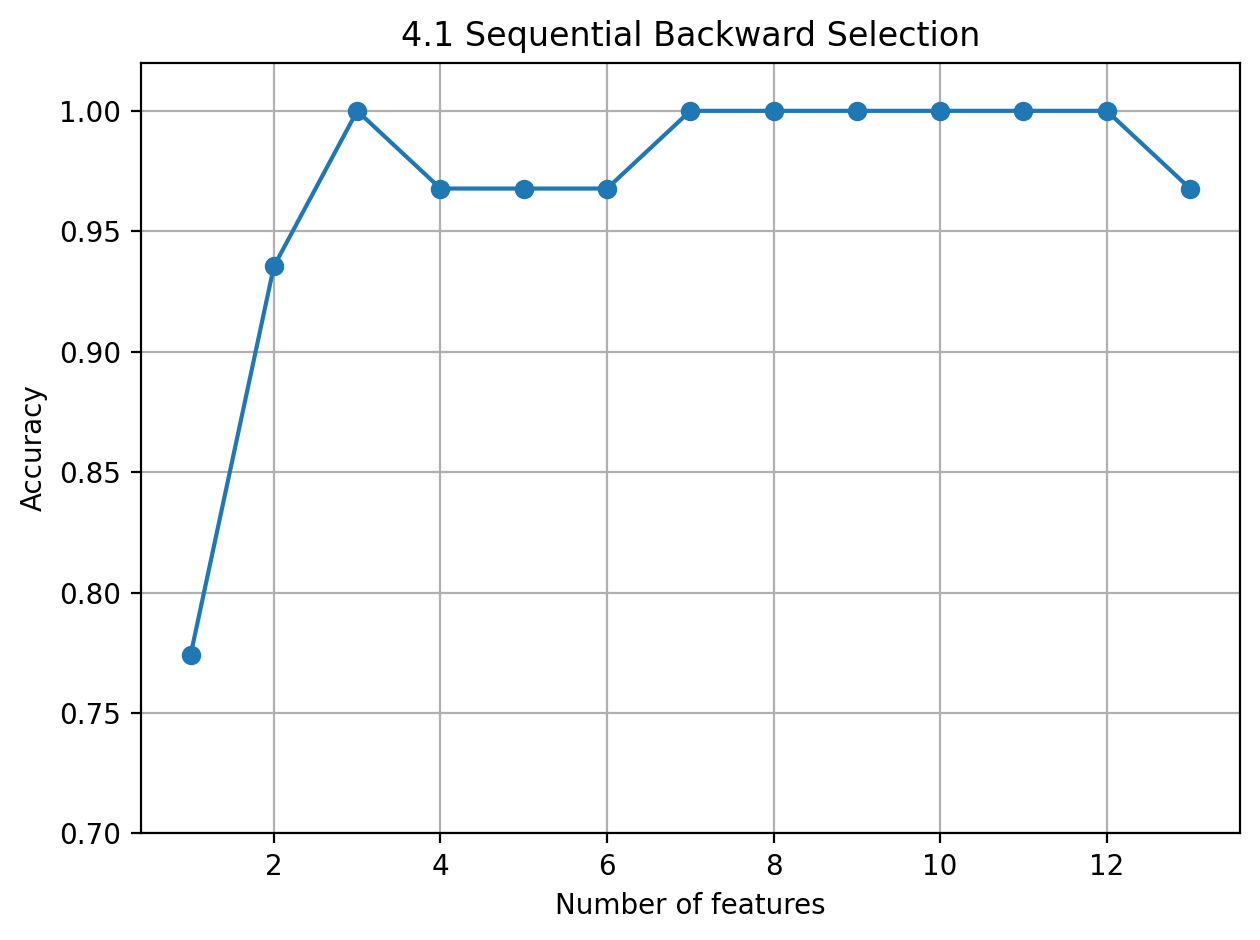

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('4.1 Sequential Backward Selection')
plt.grid()
plt.tight_layout()
plt.show()

In [52]:
#SBS - Analysing the result

print('The smallest feature subset that yielded such a good performance on the validation dataset has the following features')
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3], '\n')



print('The accuracy of the KNN classifier on the original test set is as follow:')
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test) , '\n')

print('The three-feature subset has the following accuracy')
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k3], y_test))

The smallest feature subset that yielded such a good performance on the validation dataset has the following features
Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object') 

The accuracy of the KNN classifier on the original test set is as follow:
Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629 

The three-feature subset has the following accuracy
Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


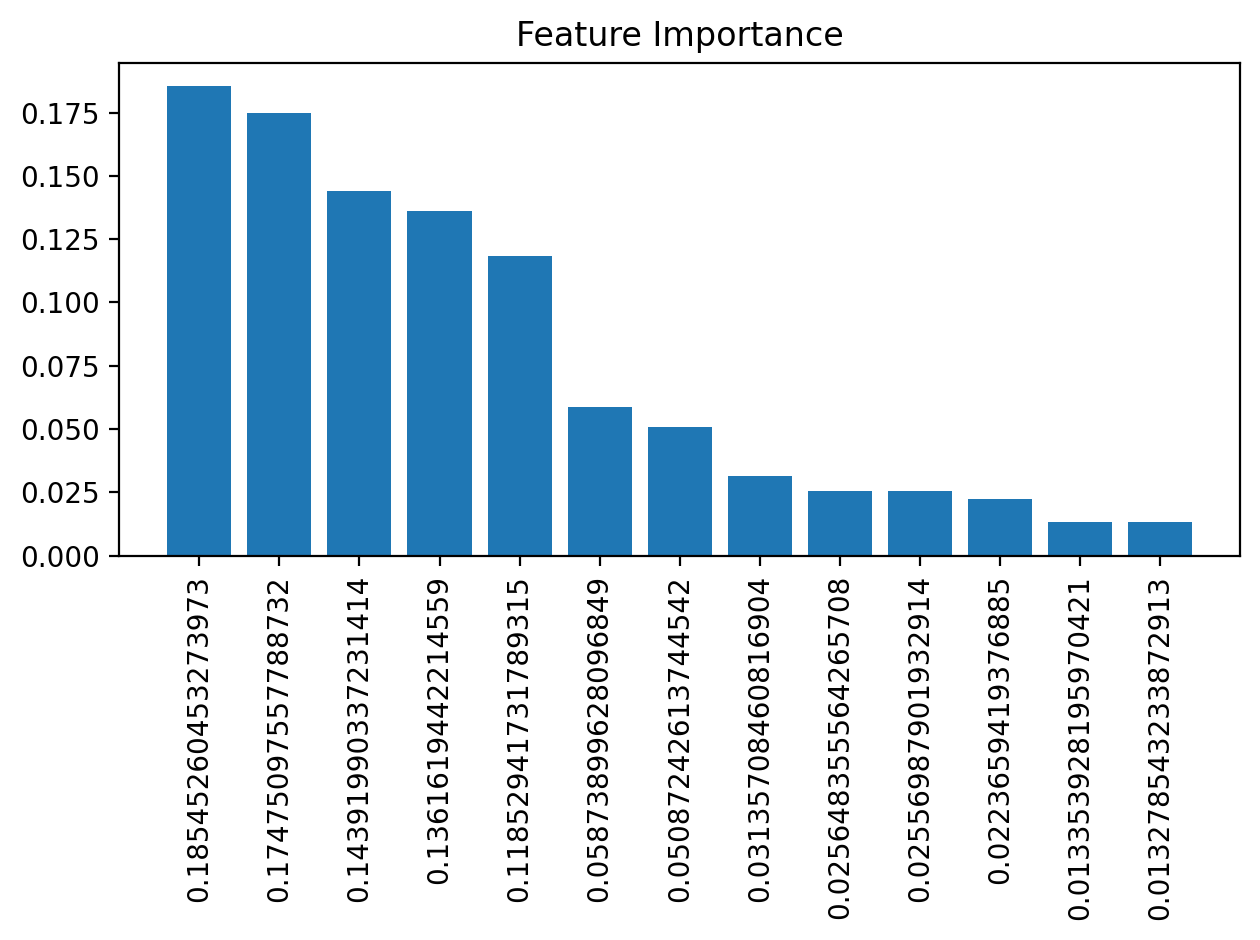

In [53]:
#Assessing Feature Importance
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), importances[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [54]:
# 2-layer Neural Network
from numpy.random import randn

N, D_in, H, D_out = 64, 1000, 100, 10
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)

for t in range(2000):
  h = 1 / (1+np.exp(-x.dot(w1)))
  y_pred = h.dot(w2)
  loss = np.square(y_pred - y).sum()
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h.T.dot(grad_y_pred)
  grad_h = grad_y_pred.dot(w2.T)
  grad_w1 = x.T.dot(grad_h * h * (1 - h))

  w1 -= 1e-4 * grad_w1
  w2 -= 1e-4 * grad_w2

0 40256.78142200319
1 23725.871702741562
2 16687.99925320965
3 13268.489460973859
4 11514.927978524865
5 10498.631134018982
6 9804.843104407162
7 9279.443440834086
8 8860.29682186111
9 8516.829362403794
10 8210.801647733964
11 7945.082599695025
12 7728.263106664401
13 7537.484334573805
14 7363.042437691608
15 7200.136397365589
16 7044.90155766542
17 6891.640017828918
18 6733.296109497016
19 6563.974876439101
20 6402.576728069993
21 6258.110524513717
22 6122.510311741705
23 5996.959341825029
24 5877.971743771767
25 5760.653723738905
26 5654.985781268994
27 5561.603518671345
28 5474.7748206769065
29 5392.018294816775
30 5312.146086266493
31 5234.437444592816
32 5158.354813441074
33 5083.393717851899
34 5009.02134861653
35 4934.743146321309
36 4860.3394248663135
37 4786.204618815817
38 4713.2652580948325
39 4642.298010514904
40 4573.650511311973
41 4507.4287587271865
42 4443.81476497993
43 4383.067683779744
44 4325.0451968389825
45 4269.215598935494
46 4215.0061860246105
47 4161.930009767

In [55]:
# Regression

In [56]:
# new dataset - Housing Dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                  'python-machine-learning-book-3rd-edition'
                  '/master/ch10/housing.data.txt',
                  header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

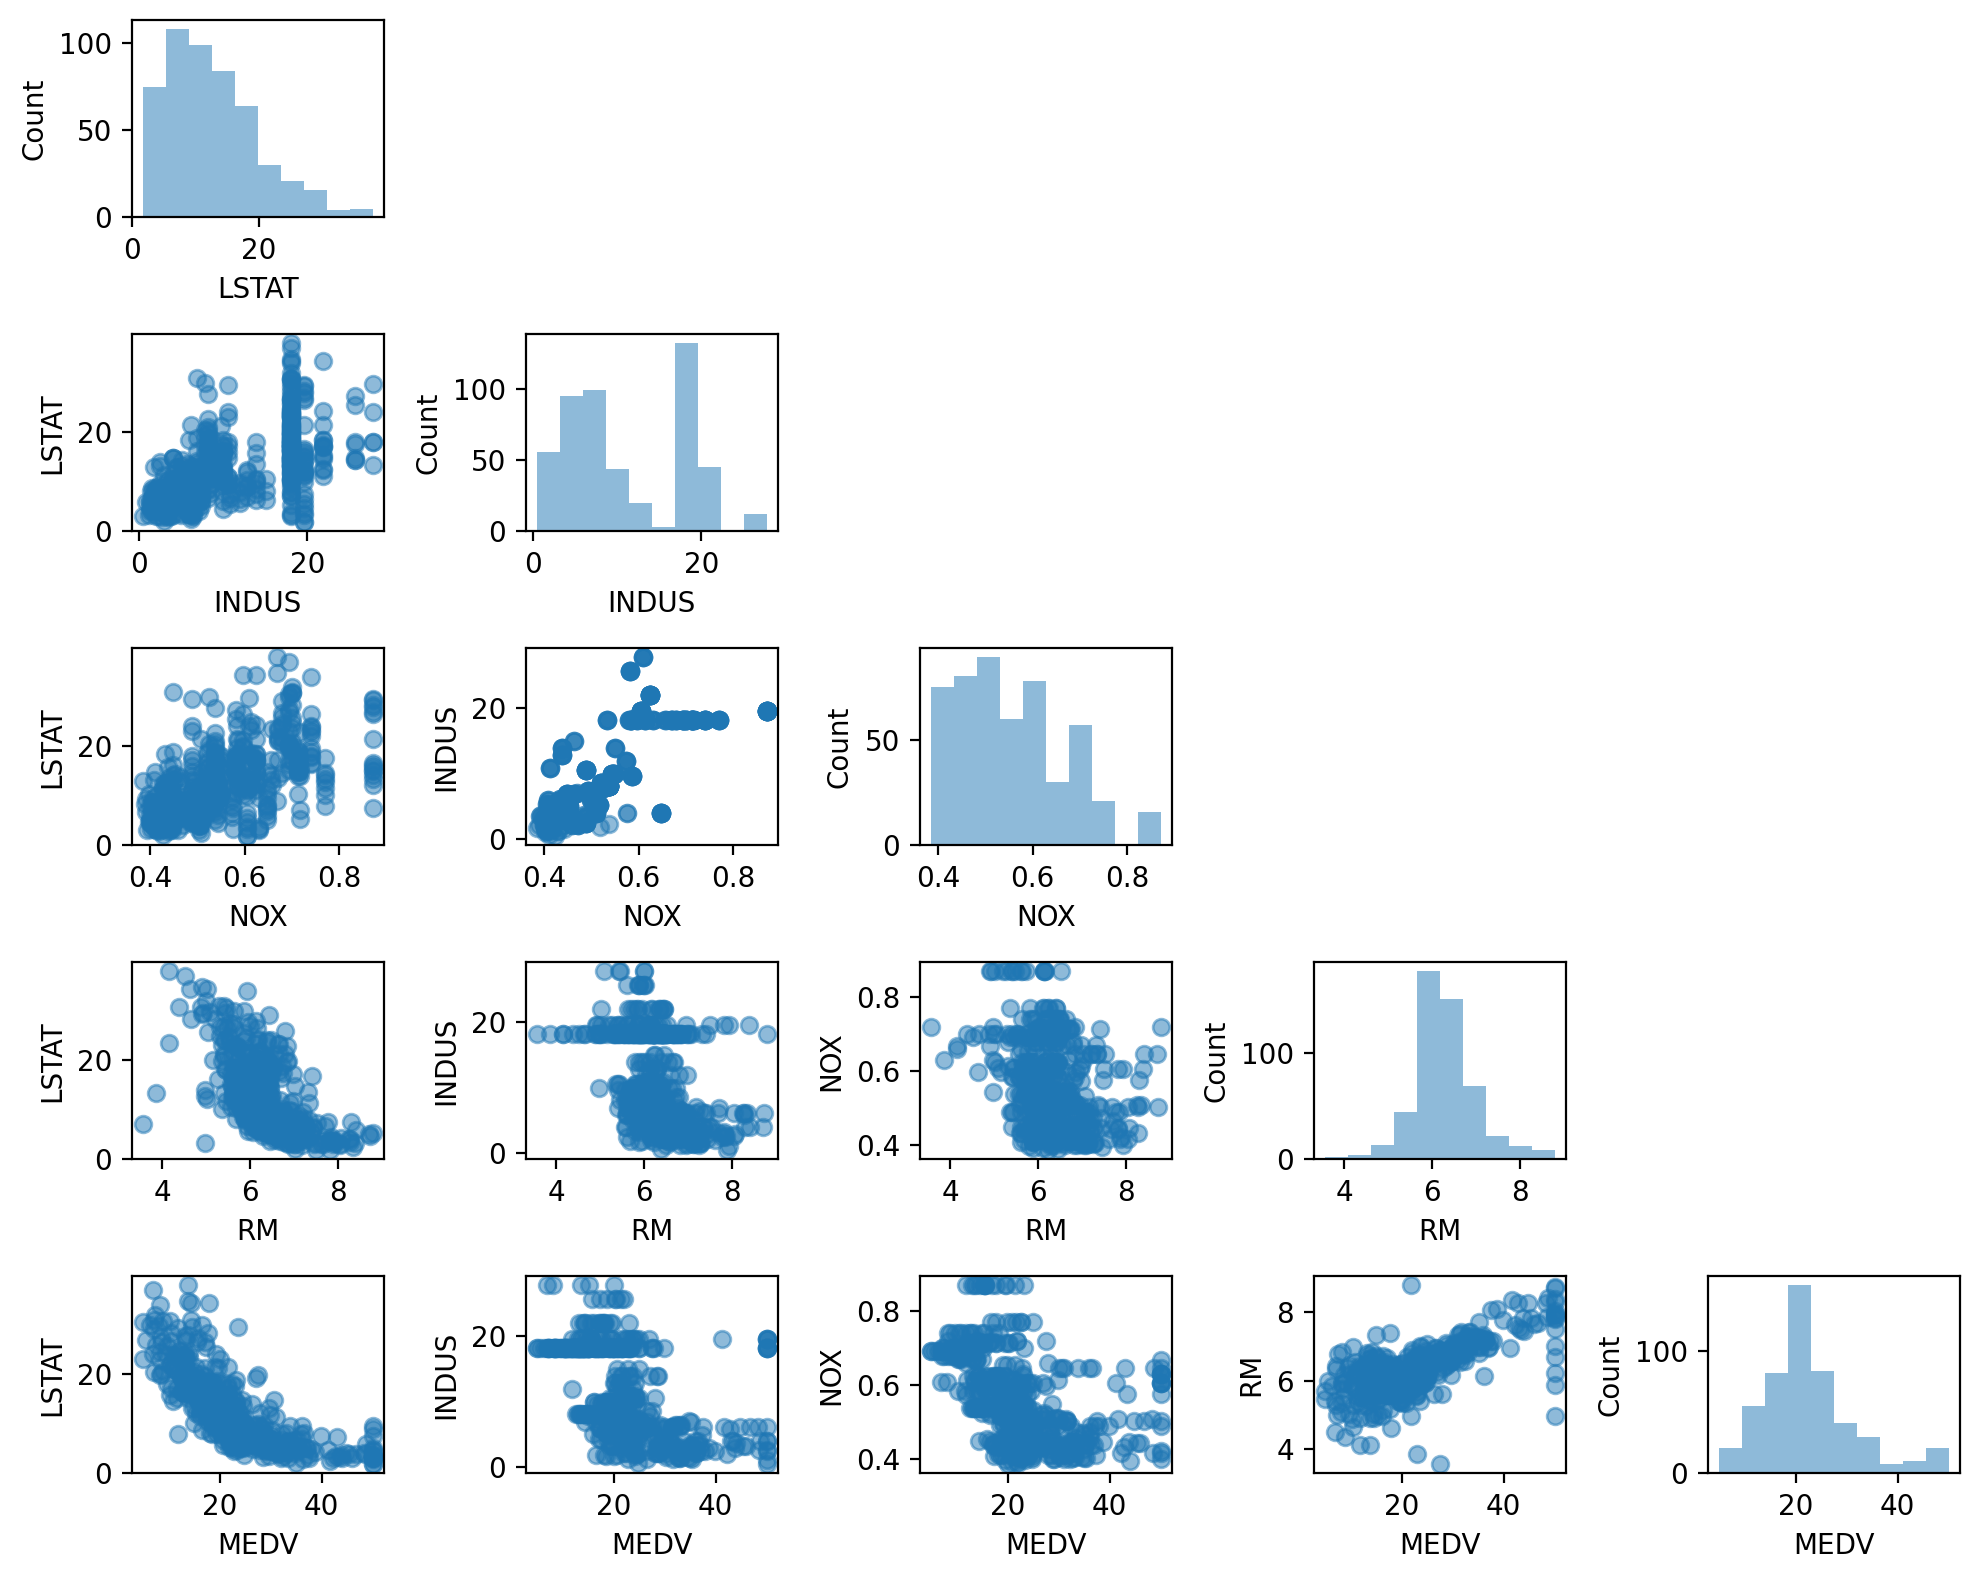

In [57]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
scatterplotmatrix(df[cols].values, figsize = (10, 8), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x7cd839423010>,
 [Text(0.5, 0, 'LSTAT'),
  Text(1.5, 0, 'INDUS'),
  Text(2.5, 0, 'NOX'),
  Text(3.5, 0, 'RM'),
  Text(4.5, 0, 'MEDV')])

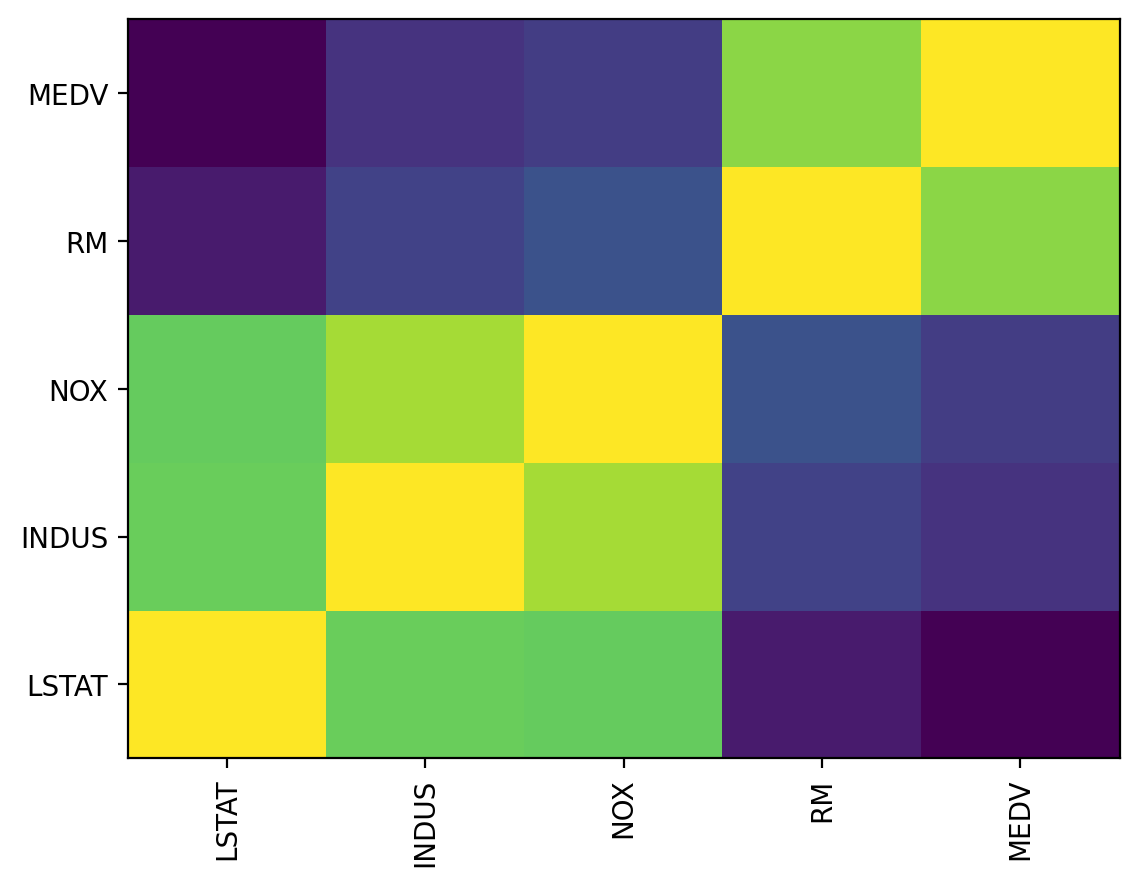

In [58]:
# Correlation Matrix using Pearson product moment correlation coefficient
import numpy as np
cm = np.corrcoef(df[cols].values.T)
plt.pcolor(cm)
plt.yticks(np.arange(0.5, len(cols)), cols)
plt.xticks(np.arange(0.5, len(cols)), cols, rotation='vertical')

<function matplotlib.pyplot.show(close=None, block=None)>

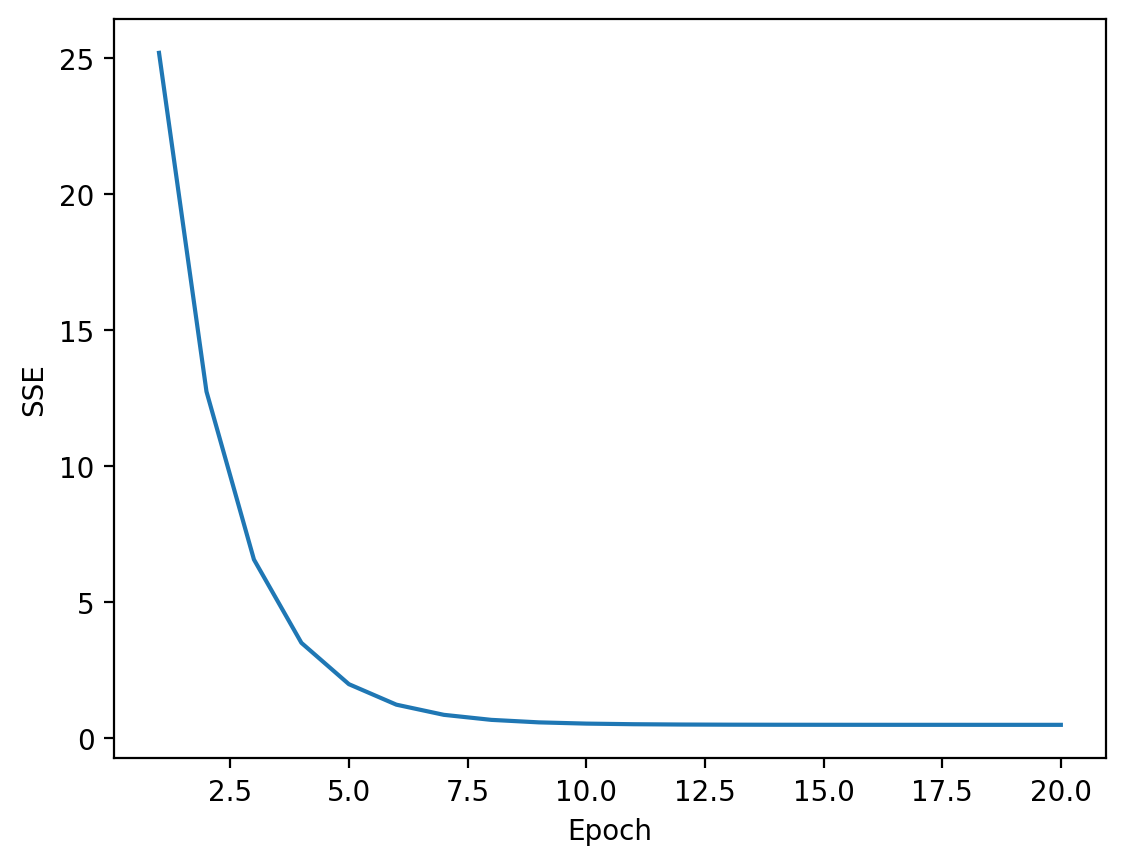

In [59]:
# Ordinary Least Squares - OLS

class LinearRegressionGD(object):
  def __init__(self, eta=0.001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    return self.net_input(X)
#
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.1, 1.9, 3.05, 4.5, 4])
lr = LinearRegressionGD(eta=0.005).fit(X, y)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show

In [60]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return
lin_regplot(X, y, lr)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [61]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [62]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [63]:
# Random Sample Consensus (RANSAC algorithm)

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=2,
                         loss="absolute_error", residual_threshold=5.0, random_state=0)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolors='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolors='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2, label='RANSAC regressor')
plt.legend(loc='upper left')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.815
Intercept: -44.440


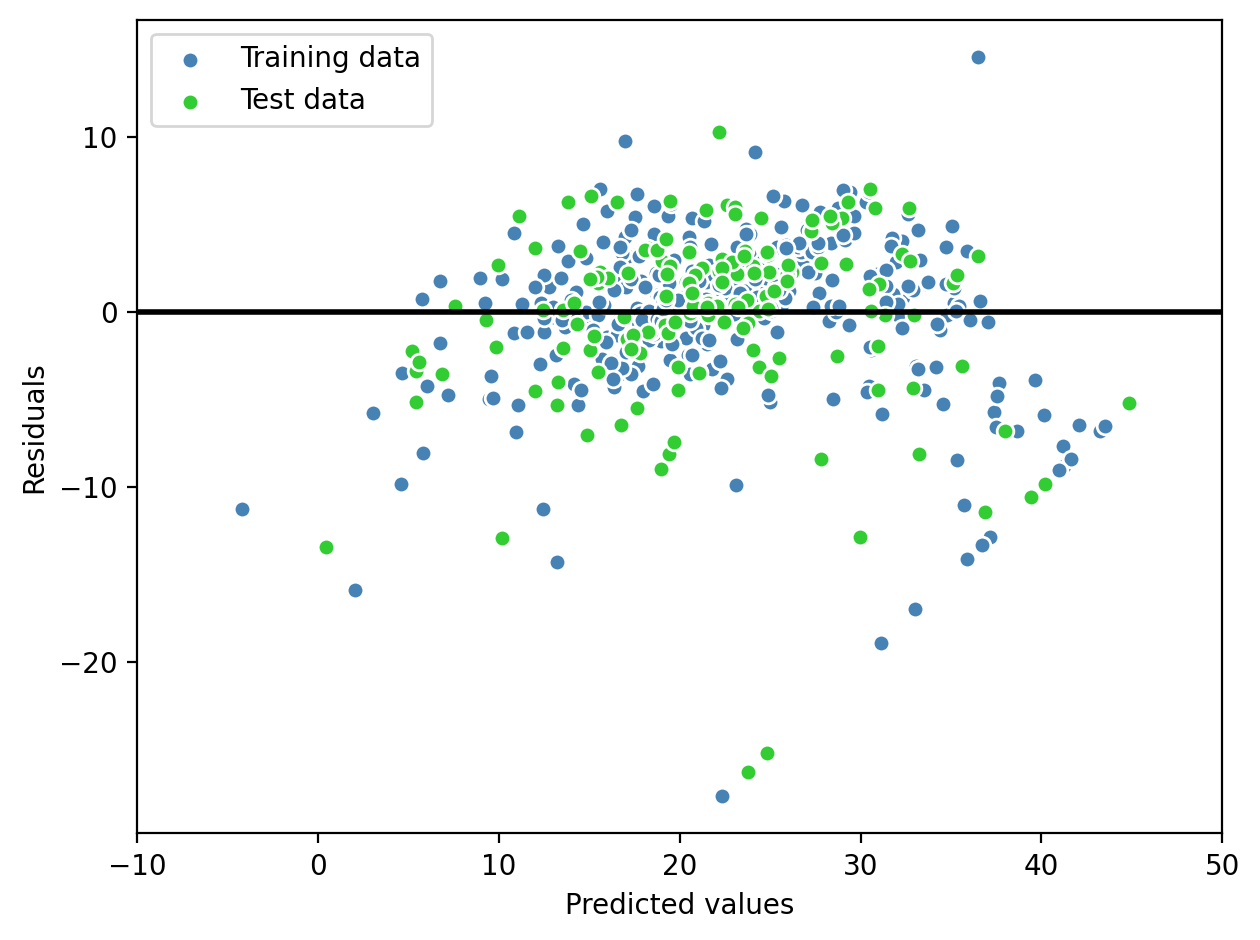

In [64]:
# Performance Evaluation

from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#Residual Plot

plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', edgecolors='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', edgecolors='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [65]:
# Mean Squared Error MSE - measure model's performance
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

#Coefficient of Determination  - standardized version of MSE for better interpretability of the model's performance
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

#Regularization fro Regression - shrinking parameter values of the model to induce a penalty against complexity / prevent overfitting
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


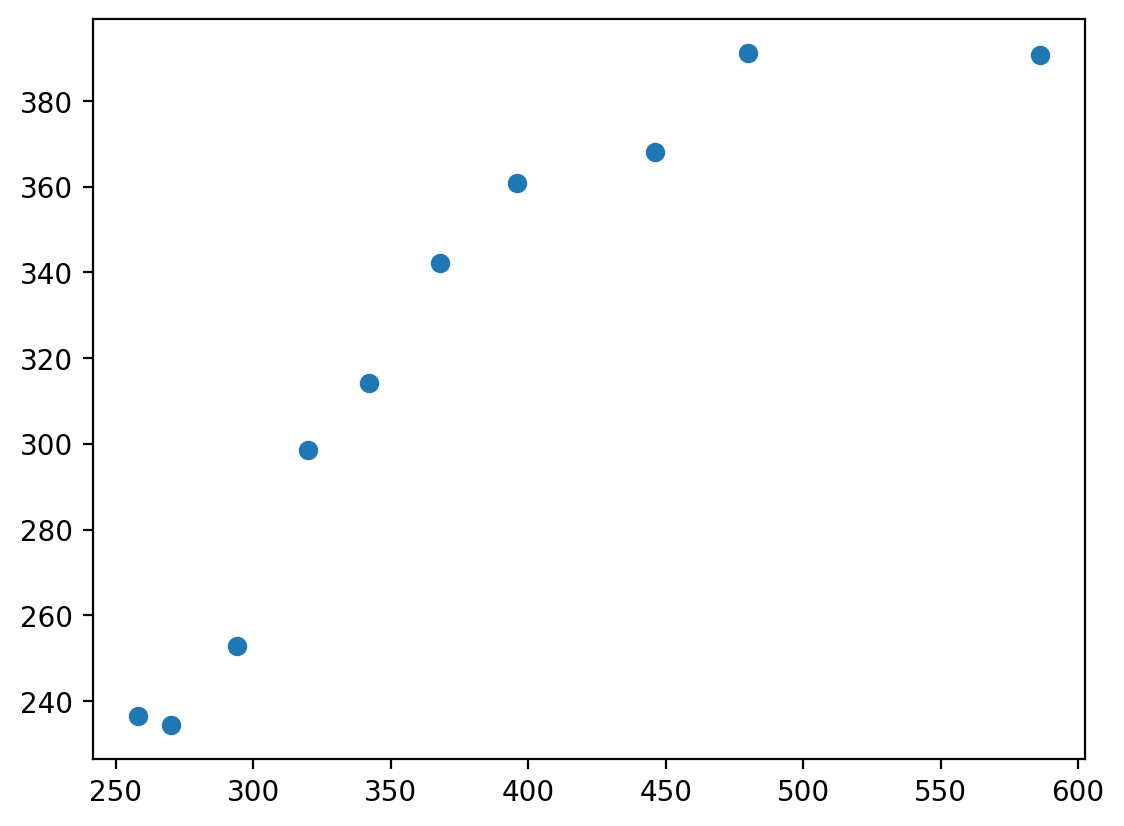

In [66]:
# Polynomial Regression
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
plt.scatter(X, y)
plt.show()

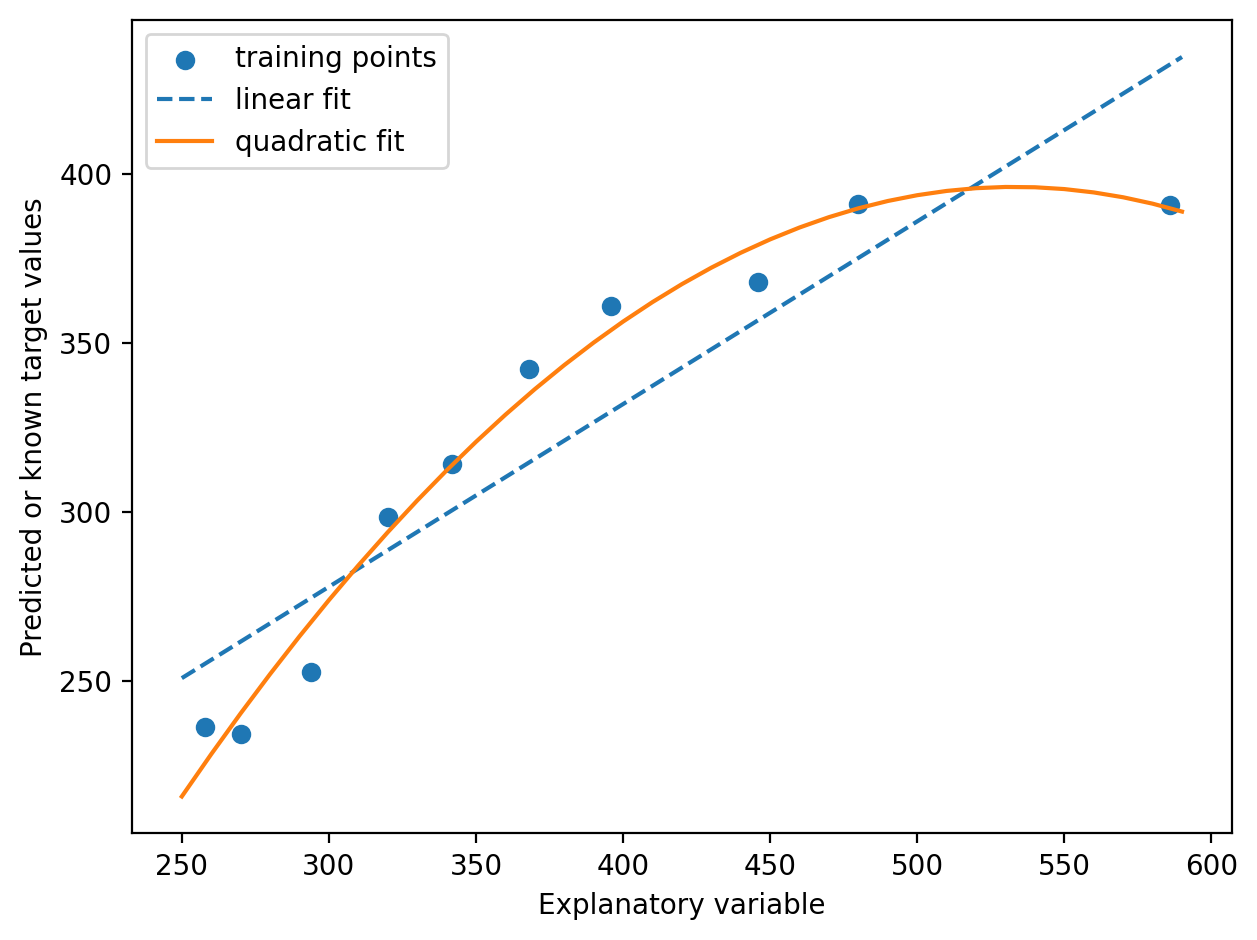

In [67]:
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')

plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [68]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f'
      % (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f'
      % (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


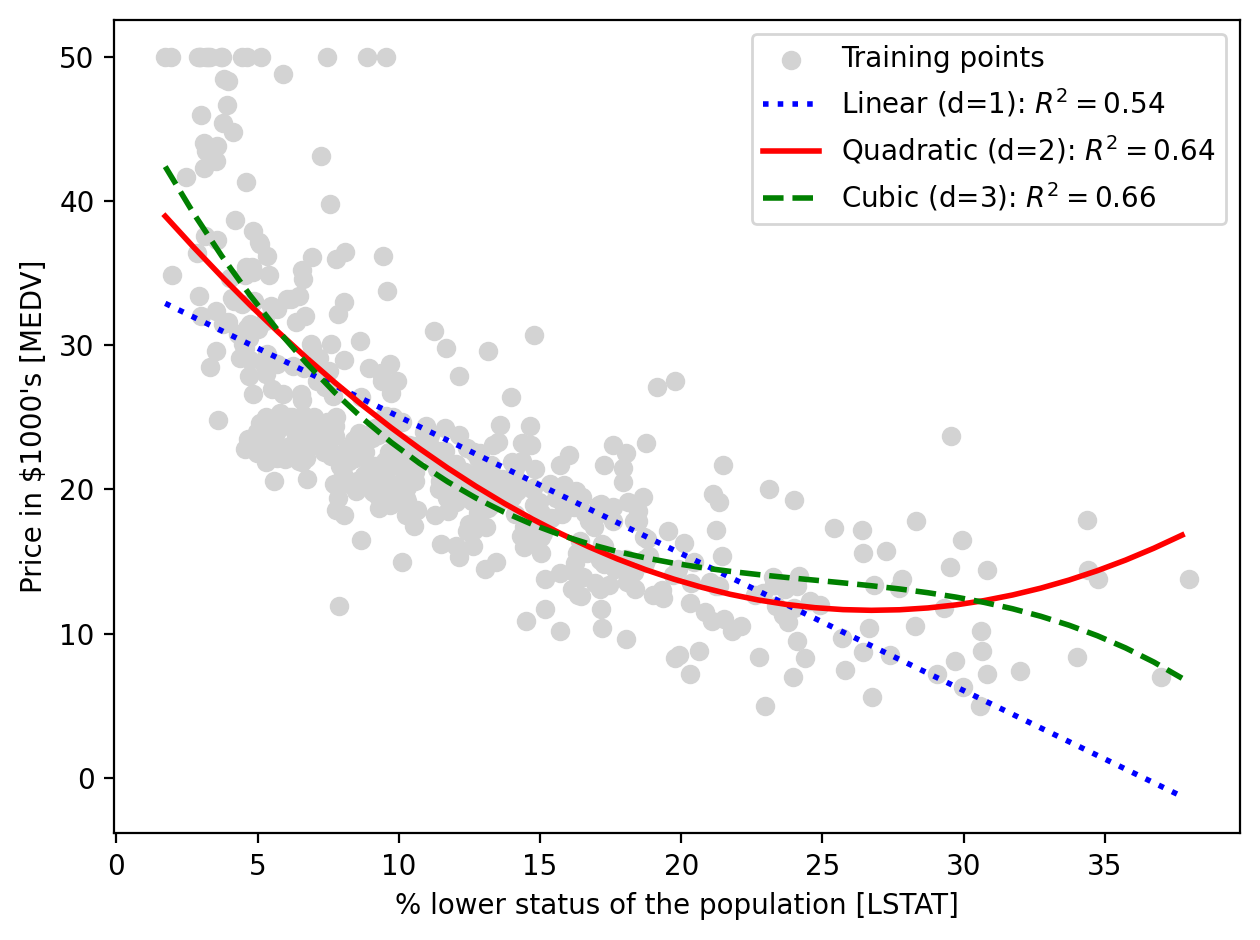

In [69]:
# Non linear Relationship in the Housing Dataset
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()
#Create quadratic features
quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)
#Create cubic features
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)

#fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1): $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit,
         label='Quadratic (d=2): $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3): $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

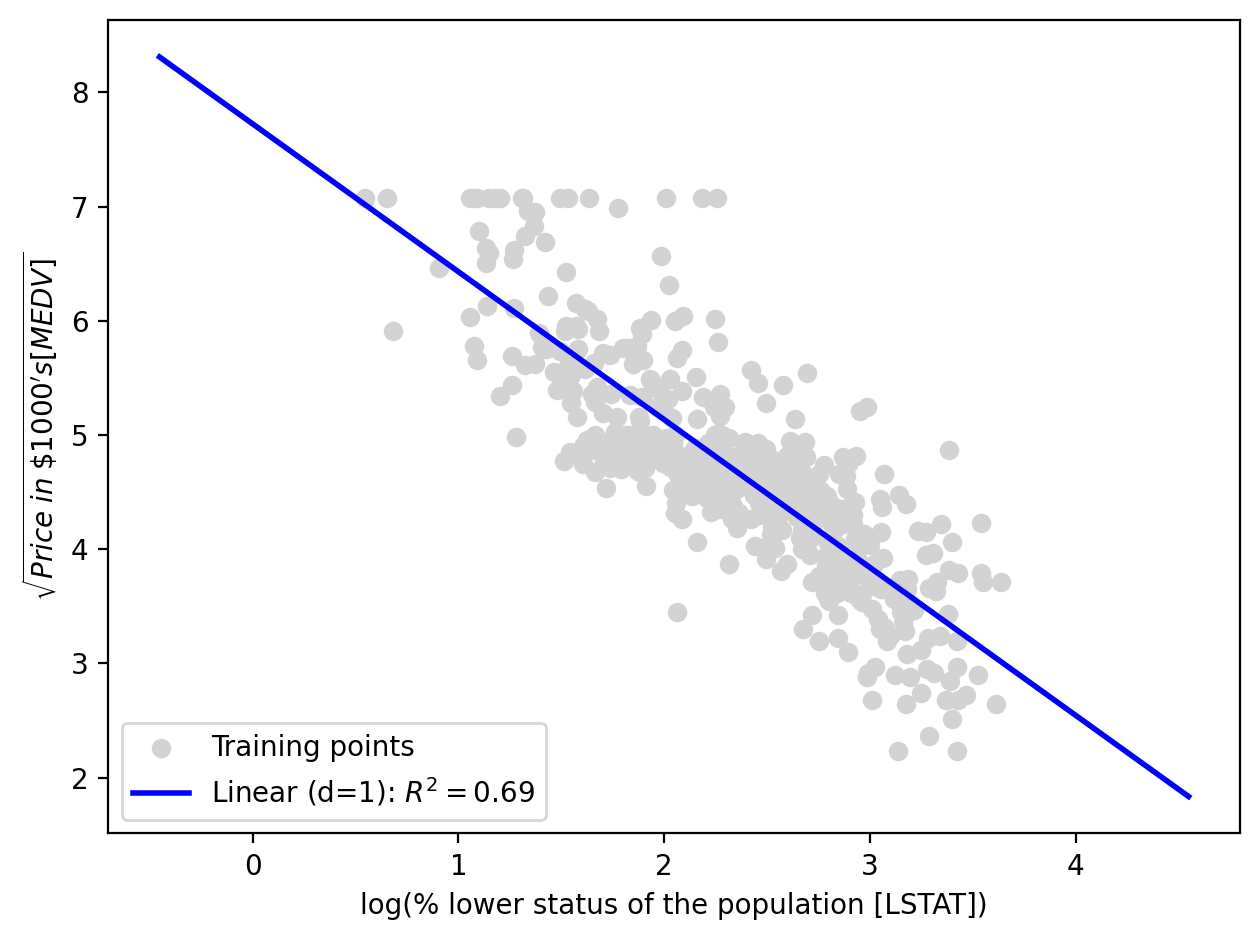

In [70]:
# The relationship between the two variables looks quite similar to an exponential function

X = df[['LSTAT']].values
y = df['MEDV'].values
X_log = np.log(X)
y_sqrt = np.sqrt(y)
X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1): $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



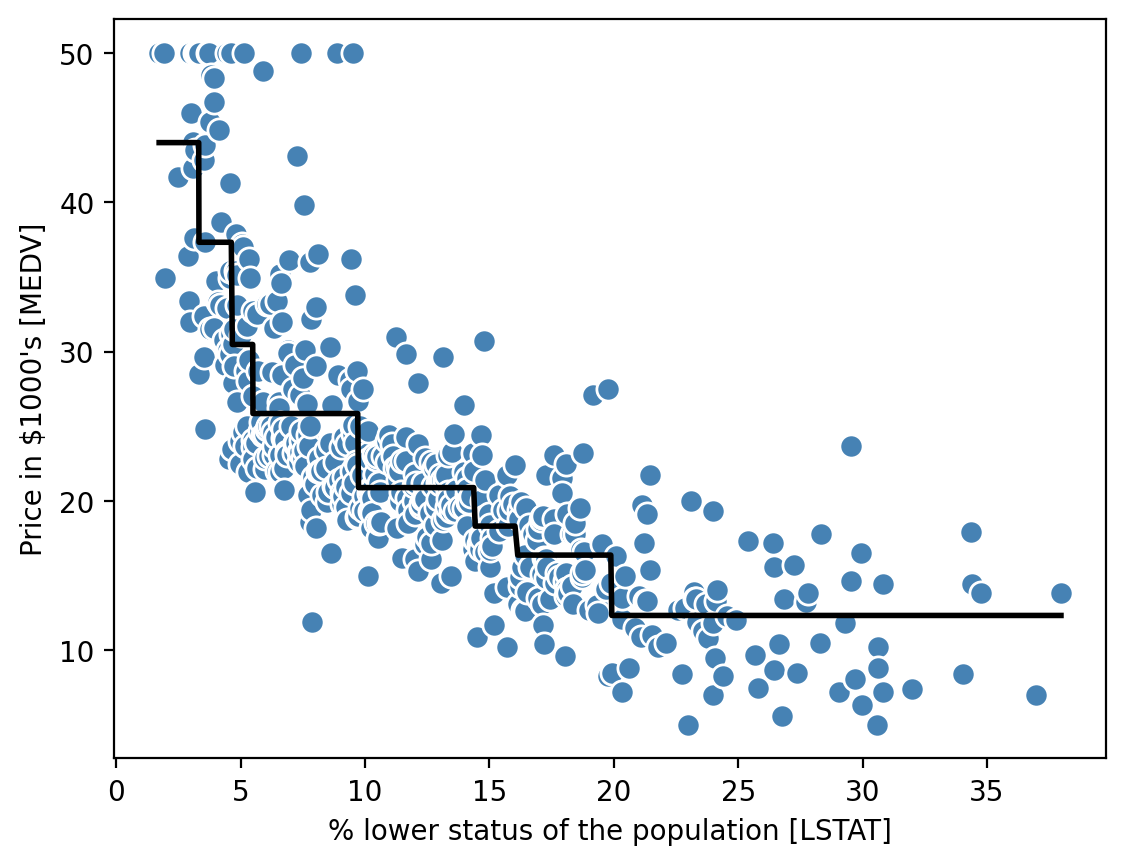

In [71]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [72]:
# Random Forest Regression
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000, criterion='friedman_mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.050
R^2 train: 0.979, test: 0.878


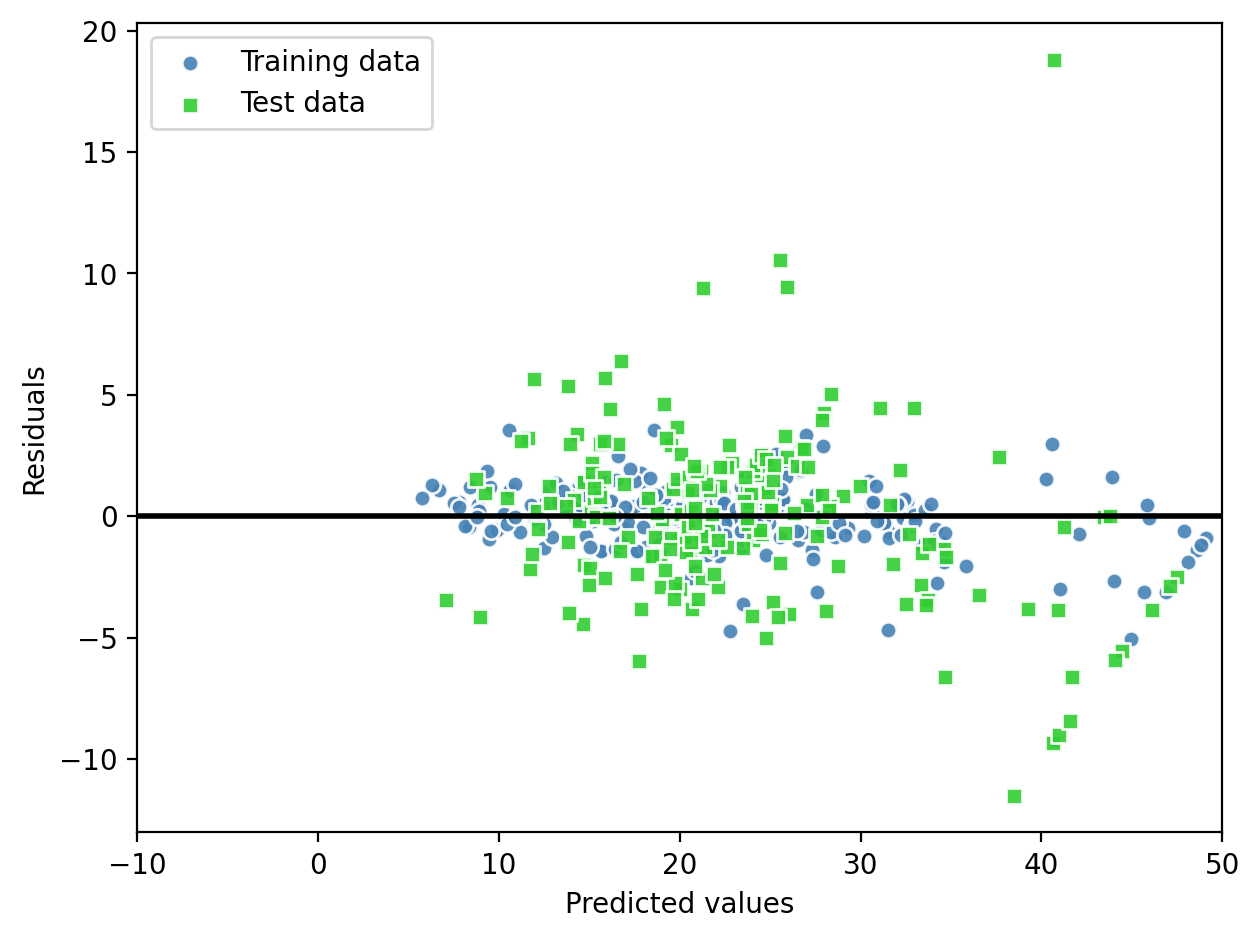

In [73]:
#plot for Random Forest Regression

plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', edgecolors='white',
            s=35, marker = 'o',
            alpha = 0.9, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', edgecolors='white',
            s=35, marker = 's',
            alpha = 0.9, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [74]:
# ========Chapter 8==========
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [75]:
#Covariance matrix Construction and Decomposition
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


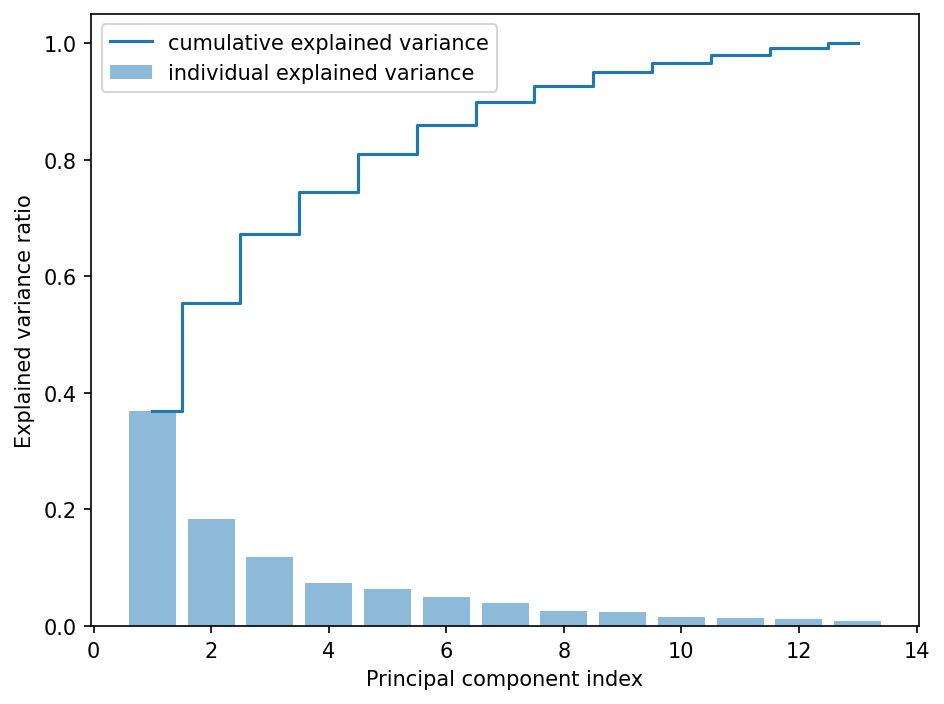

In [76]:
# Explained variance
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 150
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


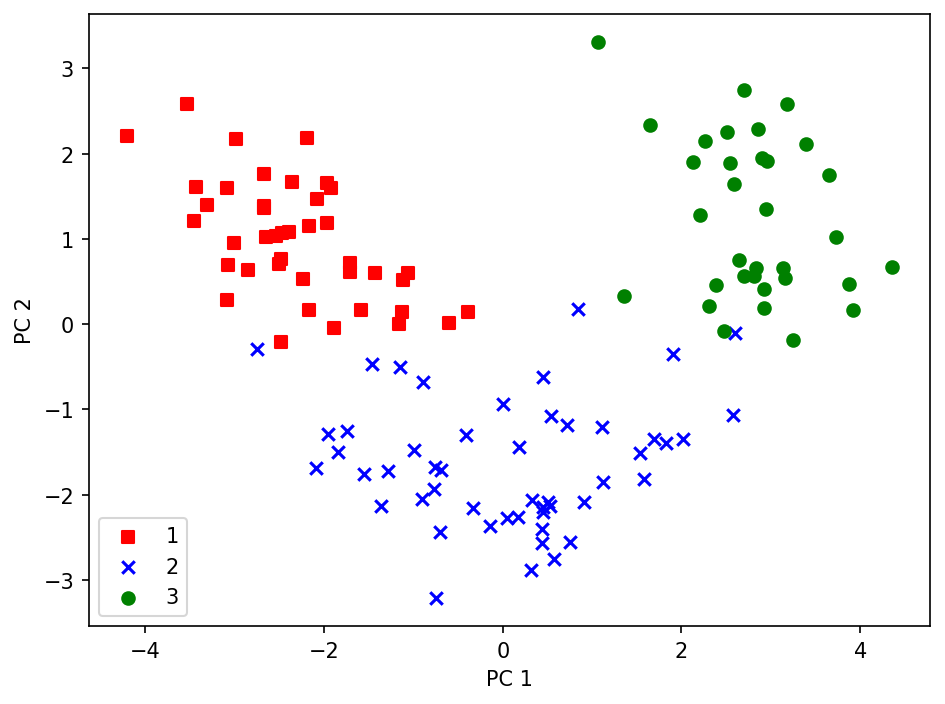

In [77]:
#Sort the eigenvalues

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key= lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

X_train_pca = X_train_std.dot(w)

#Visualization

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

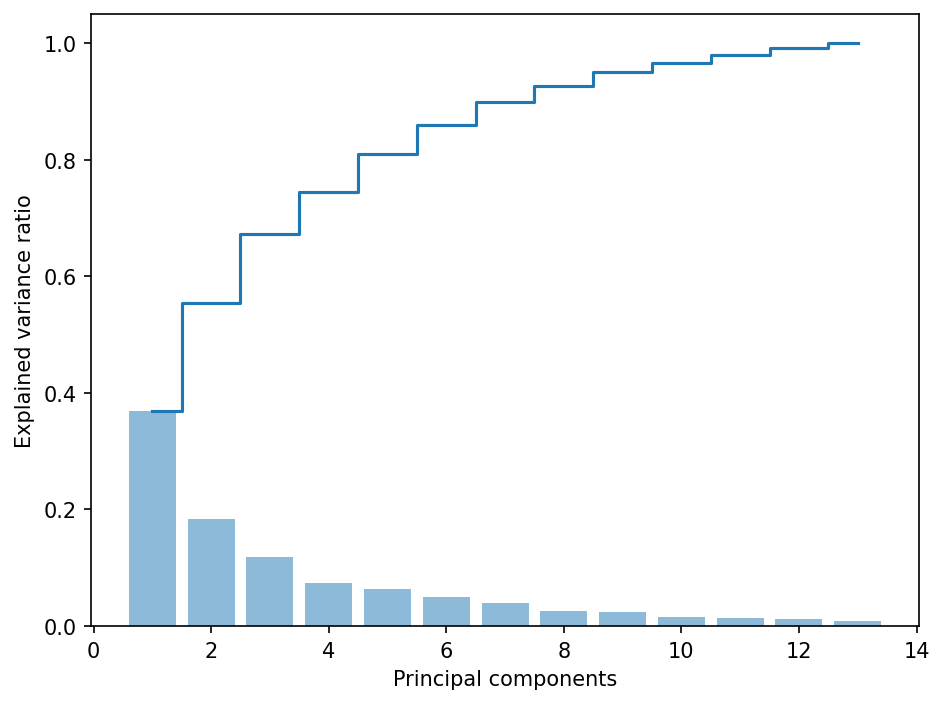

In [78]:
#scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
plt.bar(range(1,14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()
plt.show()


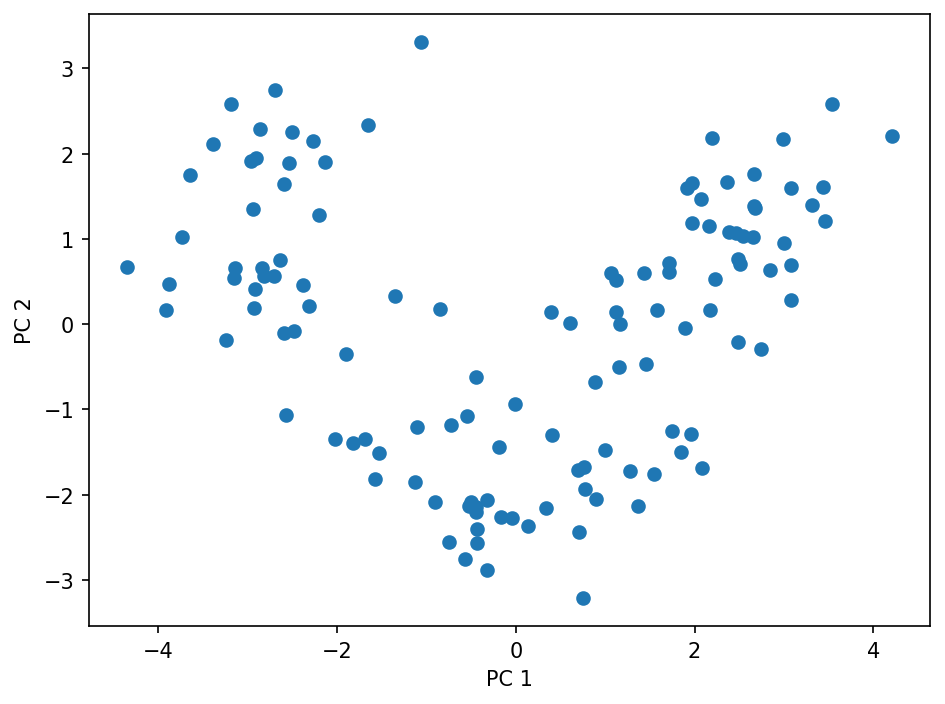

In [79]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


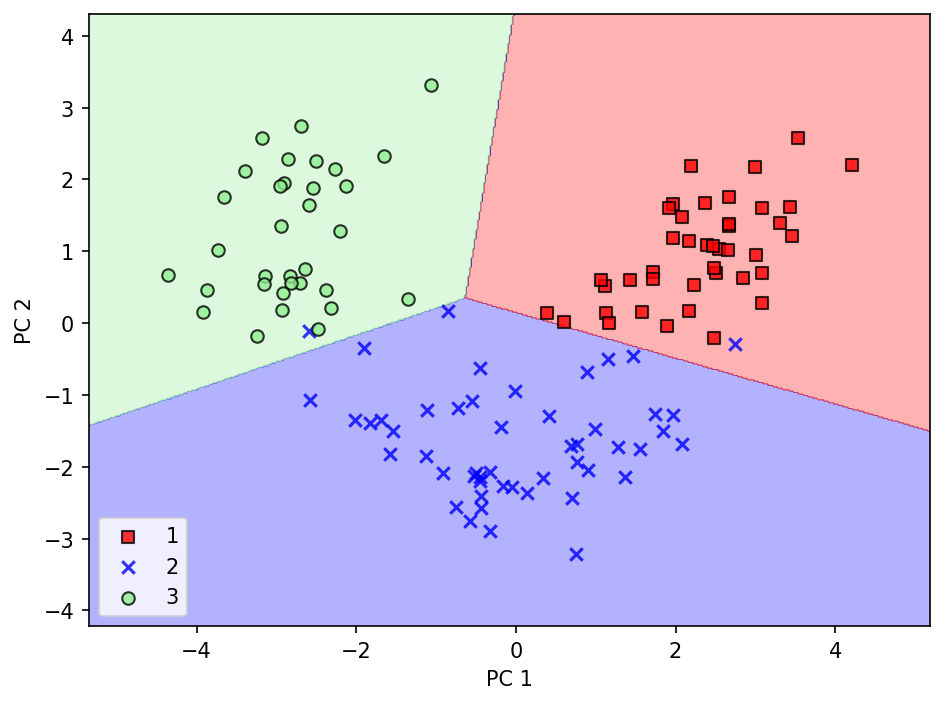

In [80]:
# Wine Training Dataset
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


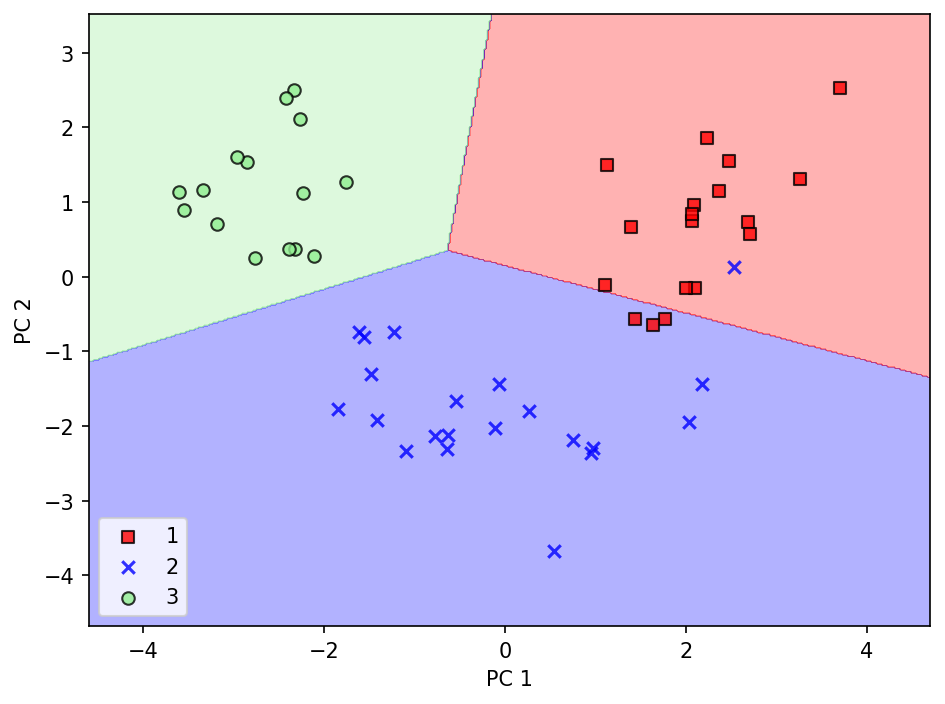

In [81]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [82]:
#LDA - Linear Discriminant Analysis
#compute mean vectors
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
  print('MV %s: %s' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


In [83]:
#Construct scatter matrix
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))
#the assumption that we are making when we are computing the scatter matrices is that
#the class labels in the training set are uniformly distributed, however, we see that this assunption is violated
print('Class label distribution: %s' %np.bincount(y_train)[1:])

Within-class scatter matrix: 13x13
Class label distribution: [41 50 33]


In [84]:
# Thus we scale the individual scatter matrices by dividing it
#by the number of class samples n_i before we sum them up as scatter matrix
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [85]:
#compute between-class scatter matrix
mean_overall = np.mean(X_train_std, axis = 0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)
  mean_overall = mean_overall.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' %(S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [86]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [87]:
eigne_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse=True)
print('Eigenvalues in descending order: \n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in descending order: 

4.8427453156558915
2.4160245870352246
1.5484582488203518
0.9612043774977352
0.8416616104578422
0.6620634040383028
0.5182847213561956
0.34650376641286684
0.3131368004720883
0.21357214660527363
0.18086130479496632
0.15362835006711043
0.10754642369671003


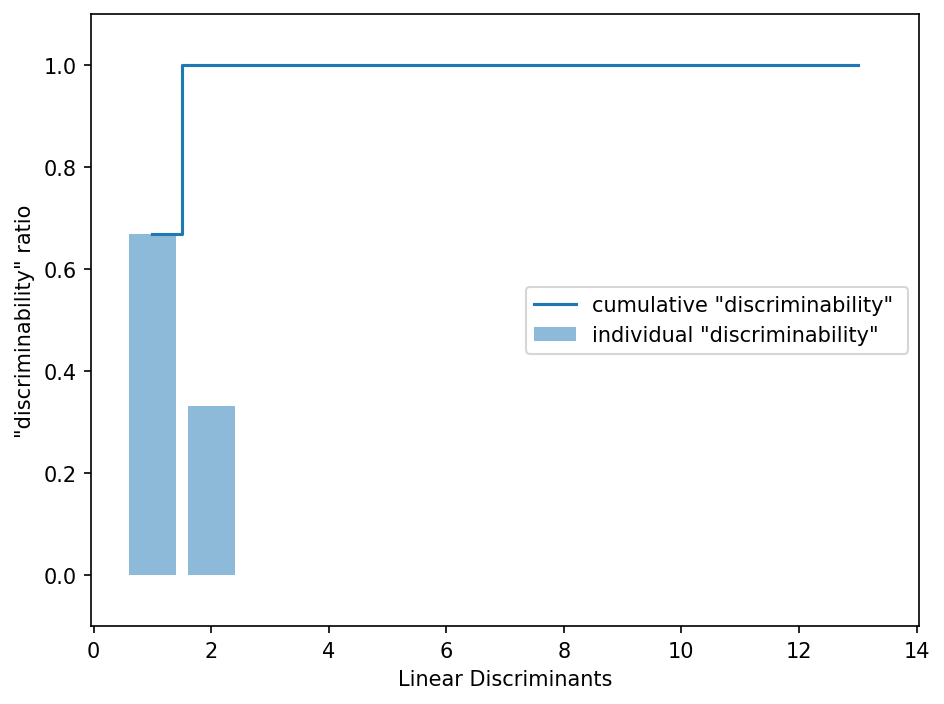

In [88]:
#Discriminability
# To measure how much of the class discriminatory information is captured by the eigenvectors
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual "discriminability" ')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative "discriminability" ')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [89]:
#Construct W, transformation matrix
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


In [90]:
# Project samples onto the new space using the transformation matrix W
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1]*(-1), c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


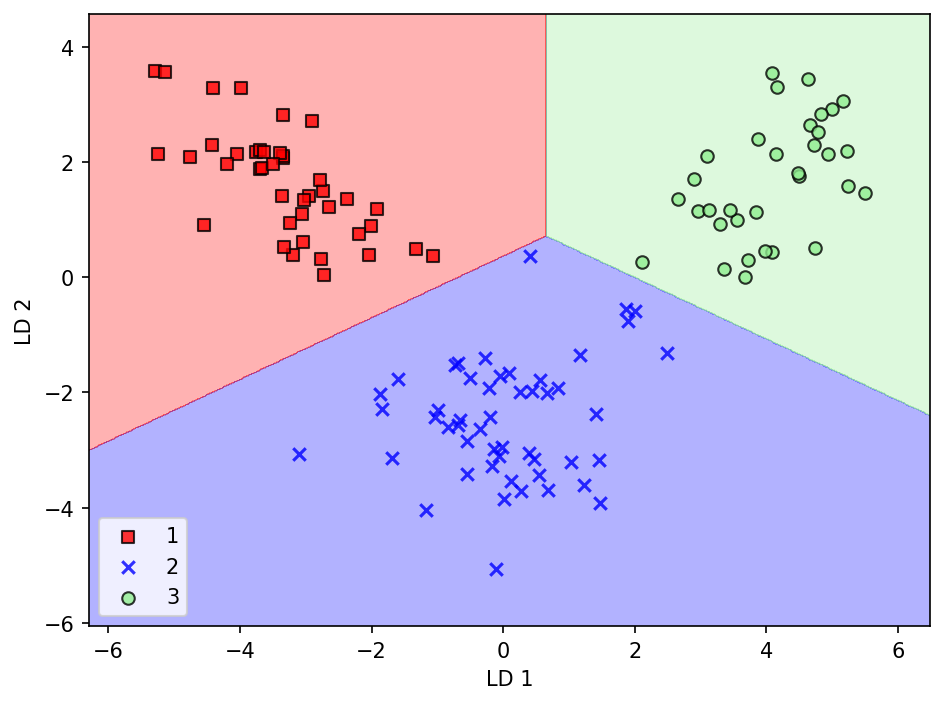

In [91]:
#LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3839009512.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


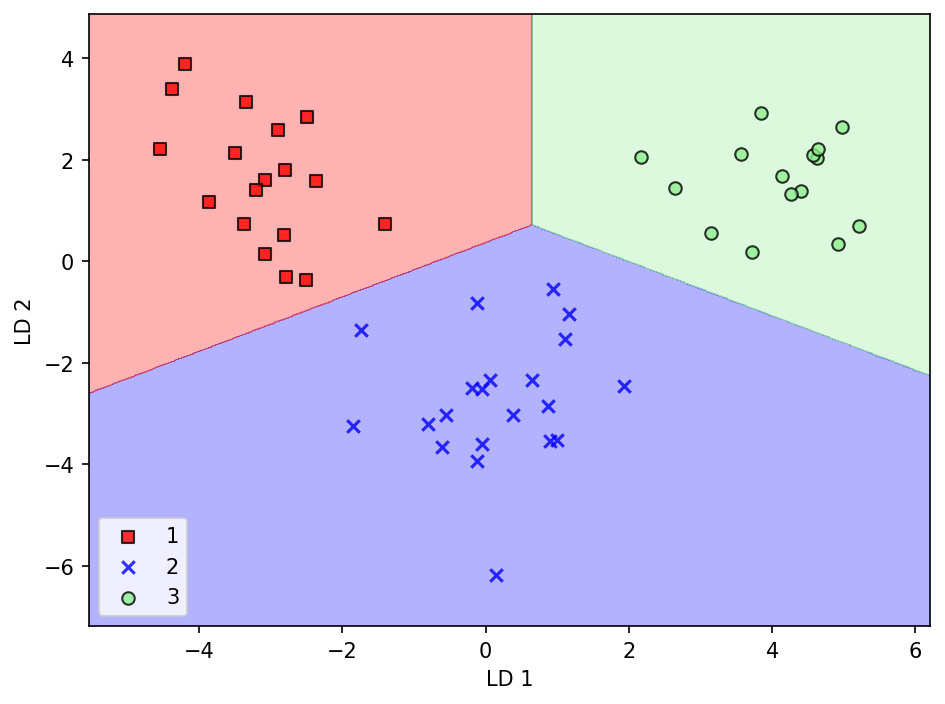

In [92]:
#Test set results
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Chapter 9 Evaluation & Tuning
## Motivation
* Learn about the best practices of building models by fine-tuning the model and evaluating its performance

  * Obtainunbiased estimates of a model's performance
  * Diagnose the common problems of machine learning algorithms
  * Fine-tune machine learning models
  * Evaluate predictive models using different performance metrics

## Outline
* Pipelining Transformers
* Validation
  * Holdout
  * Cross-Validation
* Learning and Validation Curve
* Hyperparameter Search
* Performance Evaludation Metrics
  * Precision
  * Recall
  * F1 score
  * Receiver Operating Characteristic
* Scoring Metrics for Multiclass Classification
* Class Imbalance



In [93]:
# Using Breast Cancer Wisconsin Dataset (BCWD)
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
print(df.shape)
df.head()

(569, 32)


0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [94]:
#Preprocessing
# assign the 30 features to a Numpy array X
# Using LabelEncoder object, transform the class labels from their original string representation (M and B) into integer
# Then divide the dataset into a separte training dataset 0.8 and a separate test dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [95]:
# Pipelining Transformers
# 1. Standardize
# 2. Compress our data from the 30-dimensions onto a lower tow-dimensional subspace via PCA
# 3. Feed it into a logistic regression classifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [96]:
#  Validation
# Holdout Method

#Startified K-fold Cross-Validation
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True).split(X_train, y_train)
scores = []
for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.913
Fold:  2, Class dist.: [256 153], Acc: 1.000
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.978
Fold:  5, Class dist.: [256 153], Acc: 0.891
Fold:  6, Class dist.: [257 153], Acc: 0.933
Fold:  7, Class dist.: [257 153], Acc: 0.933
Fold:  8, Class dist.: [257 153], Acc: 0.978
Fold:  9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.911

CV accuracy: 0.947 +/- 0.034


In [97]:
#Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

In [98]:
#Validation curve

from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='logisticregression__C',
                                             param_range=param_range, cv=10)

In [99]:
# Hyperparameter Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [100]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


In [101]:
# Nested Cross-Validation
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV Accuracy: 0.974 +/- 0.015


In [102]:
# Could use the nested cross-validation approach to compare an SVM model
# to a simple decision tree classifier; for simplicity we will only tune its depth parameter

from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}], scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV Accuracy: 0.934 +/- 0.016


### Different Performance Evaluation Metrics
#### In general, accuracy is a useful metric to quantify the performance of a model.
#### However, there are several other performance metrics that can be used to measure a model's relevance, such as
  * Percision
  * Recall
  * F1-score

### Confusion Matrix : a matrix that lays out the performance of a learning algorithm
#### The confusion matrix is simply a square matrix that reports the counts of the
  * True Positive (TP)
  * True Negative (TN)
  * False Positive (FT)
  * False Negative (FN)
####predictions of a classifier.


In [104]:
# Different Confusion Matrix

from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


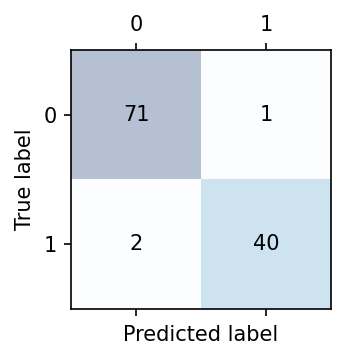

In [106]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Error and Accuracy
#### Both the prediction error (ERR) and accuracy (ACC) provide general information about how many samples are misclassified.
  * Error can be understood as the sum of all false predictions divided by the number of total predictions
  ```
  ERR = (FP + FN) / (FP + FN + TP + TN)
  ```
  * Accuracy is calculated as the sum of correct predictions divided by the total number of predictions
  ```
  ACC = (TP + TN) / (FP + FN + TP + TN) == 1 - ERR
  ```
### True/False Positive Rate
#### The True positive rate (TPR) and False positive rate (FPR) are performance metrics that are especially useful for imbalanced class problems
```
FPR = FP / N = FP / (FP + TN)
```
```
TPR = TP / P = TP / (FN + TP)
```

### Precision and Recall
#### The perforamnce metrics precision (PRE) and recall (REC) are related to those true positive and negative rates and in fact, REC is synonymous with TPR
```
PRE = TP / (TP + FP)
```
```
REC = TPR = TP / P = TP / (FN + TP)
```

#### In practice, often a combination of PRE and REC is used, the so-called F1-score
    F1 = 2 (PRE x REC) / (PRE + REC)

In [107]:
# Scoring Metrics in scikit-learn

from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


In [108]:
# Scoring metric in GridSearchCV
# we can use a different scoring metric than accuracy in the GridSearchCV via scoring parameter
# Note that the positive class in scikit-learn is the class labeled as class 1
# specify a different positive label by construct scorer via the make_scorer function

from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, pos_label=0)
c_gamma_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': c_gamma_range, 'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range, 'svc__gamma': c_gamma_range, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


### Receiver Operating Characteristic ROC
#### ROC graphs are useful tools to select models for classification based on their performance with repsect to the FPR and TPR
  * Computed by shifting the decision threshold of the classifier

#### The diagonal of an ROC graph can be interpreted as radom guessing and classification models that fall below the diagonal are consdiered as worse than random guessing
#### A perfect classifier would fall into the top left corner of the graph with a TPR of 1 and FPR of 0
#### Based on the ROC curve, we can then compute the so-called ROC Area Under the Curve (ROC AUC) to characterize the performance of a classification model

### Scoring Metrics for Multiclass Classification
#### The scoring metrics that we discussed in this section are specific to ninary classification systems
#### Macro and micro averaging methods exist to extend those scoring metrics to multiclass problems via One-versus-All (OvA) classification

#### The micro-average is calculated from the individaul TPs, TNs, FPs and FNs of the system
    PRE_micro = (TP_1 + ... + TP_k) / (TP_1 + ...TP_k + FP_1 + ... FP_k)
#### The macro-average is simply calculated as the average scores of the different systems
    PRE_macro = (PRE_1 + ... + PRE_k) / k

### Micro-averaging vs Macro-averaging
#### Micro-averaging is useful if we want to weight each instance or prediction equally
#### Macro-averaging weights all classes equally to evaluate the overall performance of a classifier


In [111]:
# Micro / Macro averaging in scikit-learn
# To evaluate multiclass classification models in scikit-learn, a weighted variant of the macro-average is used by default
# The weighted macro-average is calculated by weighting the score of each class label by the number of true instances
# The weighted macro-average is useful if we are dealing with class imbalances, that is different numbers of instances for each label
# While the weighted marco-average is the default fro multiclass problems in scikit-learn,
# we can specify the averaging method via the average parameter inside scoring functions, for example, the precision_score or make_scorer functions
pre_scorer = make_scorer(score_func=precision_score, pos_label=1, greater_is_better=True, average='micro')

#### Class Imbalance
* Common problem when working with real-world
  * Samples from one class or multiple classes are over-represented in a dataset

In [113]:
# Dealing with Class Imbalance
# Create an imbalanced dataset from our breast cancer dataset, which originally consisted of 357 benign tumors (class 0) and 212 malignant tumors (class 1)
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))
# If we were to compute the accuracy of a model that always predicts the majority class (benign, class 0), we would achieve a prediction accuracy of approximately 90 percent
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100


np.float64(89.92443324937027)

### Dealing with Class Imbalance
#### When we fit classifiers on such datasets, it would make sense to focus on other metrics than accuracy when comparing different models, such as precision, recall, the ROC curve

  * Whatever we care most about in our application
    * Our priority might be to identify the majority of patients with malignant cancer patients to recommend an additional screening, then recall should be our metric of choice
  * In spam filtering, where we don't want to label emails as spam if the system is not ver certain, precision might be a more appropriate metric
  * Aside from evaluating machine learning models, class imbalance influences a learning algorithm during model fitting itself.
  * since machine learning algorithms typically optimize a cost function computed as a sum over the training examples that it sees during fitting, the decision rule is likely biased towards the majority class
    * i.e. the algorithm implicitly learns a model that optimizes the predicitioins of the most abundant class in the dataset.
  * One way to deal with this assigns a larger penaly to wrong predictions on the minority class. Via scikit-learn, this can be achieved by setting the class_weight parameter to calss_weight='balanced', which is implemented for most classifier.

  * Other popular strategies for dealing with class imbalance include 1.upsampling the minority class, 2.downsampling the majority class, 3. generation of synthetic training samples
    * Unfortunately, there is no universally best solution, no technique that works best across different problem domain.
    * In practice, it is recommended to try out different strategies on a given problem, evaluate the results, and choose the techniques that seems most appropriate
  * The scikit-learn library implements a simple resample function that can help with the upsampling of the minority class by drawing new samples from the dataset with replacement
  * Similarly, we could downsample the majority class by removing training examples from the dataset
    * To perform downsampling using the resample function, we could simply swap the class 1 label with class 0

In [116]:
from sklearn.utils import resample
print('Number of class 1 samples before:', X_imb[y_imb==1].shape[0])
X_upsampled, y_upsampled = resample(X_imb[y_imb==1], y_imb[y_imb==1], replace=True,
                                    n_samples=X_imb[y_imb==0].shape[0], random_state=123)
print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 40
Number of class 1 samples after: 357


In [119]:
# After resampling, we can then stack the original class 0 samples with the upsampled class 1 subset to obtain a balanced dataset as follow
X_bal = np.vstack((X[y==0], X_upsampled))
y_bal = np.hstack((y[y==0], y_upsampled))
#Consequently, a majority vote prediction rule would only achieve 50 percent accuracy
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

np.float64(50.0)